# <font color = green>Housing Price Prediction using Linear, Ridge and Lasso Regression<font>

##### <font color = green> By: Mohammad Shahid rashid <font>
    
 


## <font color = blue>Problem Statement - Part I  <font>
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know the following things about the prospective properties:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.
`Also, determine the optimal value of lambda for ridge and lasso regression`.

**<font color="blue">Input Data:</font>**
- **Surprise Housing Data Set:** Contains the sale of houses in Australia.
- **Surprise Housing Data dictionary:** Data dictionary which describes the meaning of all the variables present in Housing data set.

    
## <font color = red> Business Goal  <font>

 
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Assignment flow

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning and Visualization
- Data preparation
- Model building and evaluation
- Residual analysis

### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [2]:
#import all required Python libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Added to print data on current window screen
%matplotlib inline

#Added to avoid warning and not to display on notebook
import warnings
warnings.filterwarnings("ignore")

#Added reference for Linear, Ridge and Lasso model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

pd.set_option('display.max_column',None)
pd.set_option('display.max_row',None)
pd.set_option('precision',2)

In [3]:
#importing dataset to csv

hp=pd.read_csv(r"E:\Upgrad\Masters Program in Data Science\3. Machine Learning II\5. Housing price assignment/train.csv")
hp.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
hp.shape

(1460, 81)

In [6]:
#Check Metadata using info() of DataFrame
print("Metadata of DataFrame:\n")
hp.info()

Metadata of DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null

In [8]:
#Describe the data of hp dataframe
hp.describe([0.25,0.50,0.75,0.90,0.99])

Id  MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
count  1460.00      1460.0      1201.00    1460.00      1460.00      1460.00   
mean    730.50        56.9        70.05   10516.83         6.10         5.58   
std     421.61        42.3        24.28    9981.26         1.38         1.11   
min       1.00        20.0        21.00    1300.00         1.00         1.00   
25%     365.75        20.0        59.00    7553.50         5.00         5.00   
50%     730.50        50.0        69.00    9478.50         6.00         5.00   
75%    1095.25        70.0        80.00   11601.50         7.00         6.00   
90%    1314.10       120.0        96.00   14381.70         8.00         7.00   
99%    1445.41       190.0       141.00   37567.64        10.00         9.00   
max    1460.00       190.0       313.00  215245.00        10.00         9.00   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
count    1460.00       1460.00     1452.00     1460.00     1460.00    1460.00   
mean     1971.27       1984.87      103.69      443.64       46.55     567.24   
std        30.20         20.65      181.07      456.10      161.32     441.87   
min      1872.00       1950.00        0.00        0.00        0.00       0.00   
25%      1954.00       1967.00        0.00        0.00        0.00     223.00   
50%      1973.00       1994.00        0.00      383.50        0.00     477.50   
75%      2000.00       2004.00      166.00      712.25        0.00     808.00   
90%      2006.00       2006.00      335.00     1065.50      117.20    1232.00   
99%      2009.00       2009.00      791.92     1572.41      830.38    1797.05   
max      2010.00       2010.00     1600.00     5644.00     1474.00    2336.00   

       TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
count      1460.00   1460.00   1460.00       1460.00    1460.00       1460.00   
mean       1057.43   1162.63    346.99          5.84    1515.46          0.43   
std         438.71    386.59    436.53         48.62     525.48          0.52   
min           0.00    334.00      0.00          0.00     334.00          0.00   
25%         795.75    882.00      0.00          0.00    1129.50          0.00   
50%         991.50   1087.00      0.00          0.00    1464.00          0.00   
75%        1298.25   1391.25    728.00          0.00    1776.75          1.00   
90%        1602.20   1680.00    954.20          0.00    2158.30          1.00   
99%        2155.05   2219.46   1418.92        360.00    3123.48          2.00   
max        6110.00   4692.00   2065.00        572.00    5642.00          3.00   

       BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
count       1460.00   1460.00   1460.00       1460.00       1460.00   
mean           0.06      1.57      0.38          2.87          1.05   
std            0.24      0.55      0.50          0.82          0.22   
min            0.00      0.00      0.00          0.00          0.00   
25%            0.00      1.00      0.00          2.00          1.00   
50%            0.00      2.00      0.00          3.00          1.00   
75%            0.00      2.00      1.00          3.00          1.00   
90%            0.00      2.00      1.00          4.00          1.00   
99%            1.00      3.00      1.00          5.00          2.00   
max            2.00      3.00      2.00          8.00          3.00   

       TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
count       1460.00     1460.00      1379.00     1460.00     1460.00   
mean           6.52        0.61      1978.51        1.77      472.98   
std            1.63        0.64        24.69        0.75      213.80   
min            2.00        0.00      1900.00        0.00        0.00   
25%            5.00        0.00      1961.00        1.00      334.50   
50%            6.00        1.00      1980.00        2.00      480.00   
75%            7.00        1.00      2002.00        2.00     

## 2. Data cleaning and Visualization
 - Null values
 - Drop unnecessary rows and column
 - Imputing unnecessary rows and column

In [9]:
#checking percentage of null values in each column

round(100*(hp.isnull().sum()/len(hp.index)), 2).sort_values(ascending=False).head(25) [hp.isnull().sum() > 0]

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

`Based on the above extract, we can say above 80% missing values is actually meangiful to keep in the model building, so lets drop is straight away`
- "PoolQC": Pool quality
- "MiscFeature": Miscellaneous feature not covered in other categories
- "Alley": Type of alley access to property
- "Fence": Fence quality
- "Id": index column

In [10]:
hp = hp.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'Id'],axis='columns')

In [11]:
hp.shape

(1460, 76)

In [12]:
#checking percentage of null values in each column

round(100*(hp.isnull().sum()/len(hp.index)), 2).sort_values(ascending=False).head(25) [hp.isnull().sum() > 0]

FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
dtype: float64

`We could see ther are many missing values in some of the column which may contribute our analysis, so instead we replace with other values to segregate the items`

In [19]:
hp.FireplaceQu.fillna('No Fireplace',inplace=True)
hp.GarageCond.fillna('No Garage',inplace=True)
hp.GarageType.fillna('No Garage',inplace=True)
hp.GarageFinish.fillna('No Garage',inplace=True)
hp.GarageQual.fillna('No Garage',inplace=True)
hp.BsmtExposure.fillna('No Basement',inplace=True)
hp.BsmtFinType1.fillna('No Basement',inplace=True)
hp.BsmtFinType2.fillna('No Basement',inplace=True)
hp.BsmtQual.fillna('No Basement',inplace=True)
hp.BsmtCond.fillna('No Basement',inplace=True)

In [20]:
#checking percentage of null values in each column

round(100*(hp.isnull().sum()/len(hp.index)), 2).sort_values(ascending=False).head(25) [hp.isnull().sum() > 0]

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64

lets deep dive the analysis on these 5 variable and see what best we can fit

`LotFrontage` : Linear feet of street connected to property.

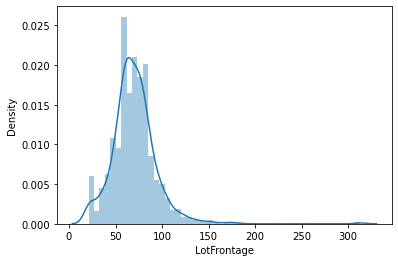

In [21]:
sns.distplot(hp.LotFrontage)
plt.show()

In [23]:
hp.LotFrontage.fillna(hp.LotFrontage.median(),inplace=True)

`GarageYrBlt`: Year garage was built

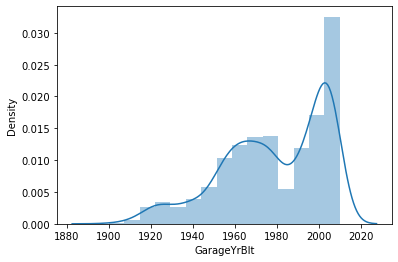

In [25]:
sns.distplot(hp.GarageYrBlt)
plt.show()

In [26]:
hp.GarageYrBlt.fillna(hp.GarageYrBlt.median(),inplace=True)

`Checking the values count for these three missing variable`

In [28]:
print(" \n\n----- Electrical: Electrical system          0.07% " )
print(hp['Electrical'].value_counts())

print(" \n\n----- MasVnrType: Masonry veneer type          0.55% " )
print(hp['MasVnrType'].value_counts())

print(" \n\n----- MasVnrArea: Masonry veneer area in square feet          0.55% " )
print(hp['MasVnrArea'].value_counts())

 

----- Electrical: Electrical system          0.07% 
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
 

----- MasVnrType: Masonry veneer type          0.55% 
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
 

----- MasVnrArea: Masonry veneer area in square feet          0.55% 
0.0       861
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0       4
76.0        4
288.0       4
456.0       4
40.0        4
50.0        3
130.0       3
82.0        3
208.0       3
90.0        3
70.0        3
44.0        3
420.0       3
99.0        3
110.0       3
104.0   

Considering the small chunk of null values, we can replace with mode for Electrical & MasVnrType and mean for MasVnrArea

In [29]:
hp.MasVnrArea.fillna(hp.MasVnrArea.mean(),inplace=True)
hp.MasVnrType.fillna('None',inplace=True)
hp.Electrical.fillna('SBrkr',inplace=True)

In [30]:
#checking percentage of null values in each column

round(100*(hp.isnull().sum()/len(hp.index)), 2).sort_values(ascending=False).head(25) [hp.isnull().sum() > 0]

Series([], dtype: float64)

`Perfect, we completed null values replacement as per the data , and now we are good to go with EDA part but before that lets do health check of dataframe`

In [31]:
hp.shape

(1460, 76)

**Below variable gives information about yeas o construction**

- YearBuilt: Original construction date
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
- MoSold: Month Sold (MM)
- YrSold: Year Sold (YYYY)

Lets derive new column HouseOld of building and dropping the other columns.
Important point to know , we need to take "YearRemodAdd" date as house was re-model. 

In [33]:
hp['HouseOld'] = hp['YrSold'] - hp['YearRemodAdd']
hp['HouseOld'].head()

0     5
1    31
2     6
3    36
4     8
Name: HouseOld, dtype: int64

In [34]:
hp.shape

(1460, 77)

In [35]:
# lets drop these 4 variable as these are of no use anymore
hp = hp.drop(['YrSold', 'MoSold','YearBuilt','YearRemodAdd'],axis='columns')

In [36]:
hp.shape

(1460, 73)

In [37]:
## Lets take variable which are highly correlated , that mean lets say 85% almosst same value. We will first normalize and then find those variable

non_normalize_cols = {}
for col in hp.columns:
    max_val = max(list(hp[col].value_counts(normalize=True).sort_values(ascending=False).head(1)))
    if max_val >= 0.85:
        non_normalize_cols[col] = round(max_val,2)
        
pd.DataFrame({'Features': list(non_normalize_cols.keys()), 'Percentage': list(non_normalize_cols.values())})

Features  Percentage
0          Street        1.00
1     LandContour        0.90
2       Utilities        1.00
3       LandSlope        0.95
4      Condition1        0.86
5      Condition2        0.99
6        RoofMatl        0.98
7       ExterCond        0.88
8        BsmtCond        0.90
9    BsmtFinType2        0.86
10     BsmtFinSF2        0.89
11        Heating        0.98
12     CentralAir        0.93
13     Electrical        0.91
14   LowQualFinSF        0.98
15   BsmtHalfBath        0.94
16   KitchenAbvGr        0.95
17     Functional        0.93
18     GarageQual        0.90
19     GarageCond        0.91
20     PavedDrive        0.92
21  EnclosedPorch        0.86
22      3SsnPorch        0.98
23    ScreenPorch        0.92
24       PoolArea        1.00
25        MiscVal        0.96
26       SaleType        0.87

In [38]:
# these are highly correlated and henceforth straightway can be dropped from the analysis
hp = hp.drop(non_normalize_cols.keys(), axis=1)

In [39]:
hp.shape

(1460, 46)

In [40]:
#We need to identify if we remove outliers then how mch percentage of data will be available. Let's calculate using Inter-Quartile Range  

numFeatures = hp.select_dtypes(['int64','float64']).columns

hp_out = hp

#Calculate for numFeatures variables
for k in numFeatures:
    IQR = hp_out[k].quantile(.75) - hp_out[k].quantile(.25)
    hp_out = hp_out[(hp_out[k] < (hp_out[k].quantile(.75) + 1.5 * IQR)) & (hp_out[k] > (hp_out[k].quantile(.25) - 1.5 * IQR))]

hp_out.shape[0]/hp.shape[0] * 100

58.56164383561644

`This would not be wise option to remove outliers considering data left after remving outliers will be only 58.56% which will anyway impact the mdel buiilding`

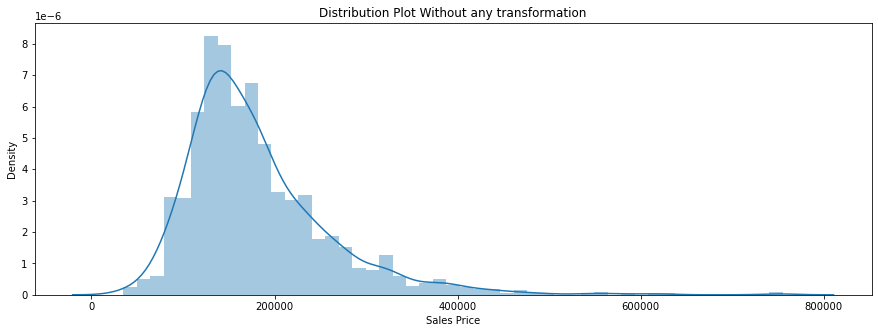

In [41]:
#plotting distribution of 'SalePrice'  without transformation and see behaviour

plt.figure(figsize=(15,5))
sns.distplot(hp.SalePrice)
plt.xlabel("Sales Price")
plt.title('Distribution Plot Without any transformation')
plt.show()

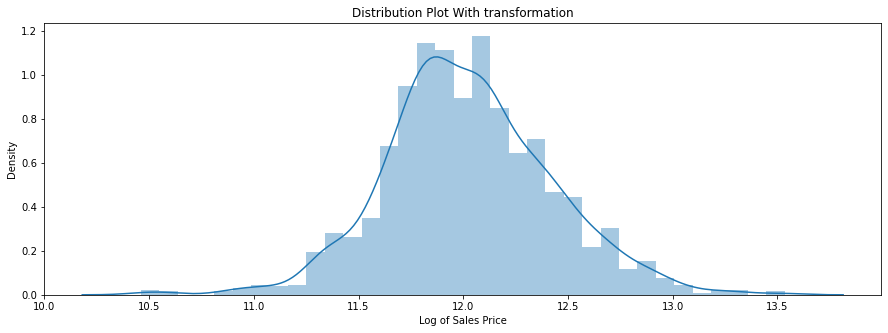

In [42]:
#plotting distribution of 'SalePrice' tranform the dependent variable by taking LOG 

plt.figure(figsize=(15,5))
sns.distplot(np.log(hp.SalePrice))
plt.xlabel("Log of Sales Price")
plt.title('Distribution Plot With transformation')
plt.show()

`By applying log transformation on dependent column, we get normal distribution of data from originally right skewed distribution. Hence it is better to transformation on SalePrice column for pure model building.`

In [43]:
hp['SalePrice'] = np.log(hp.SalePrice)

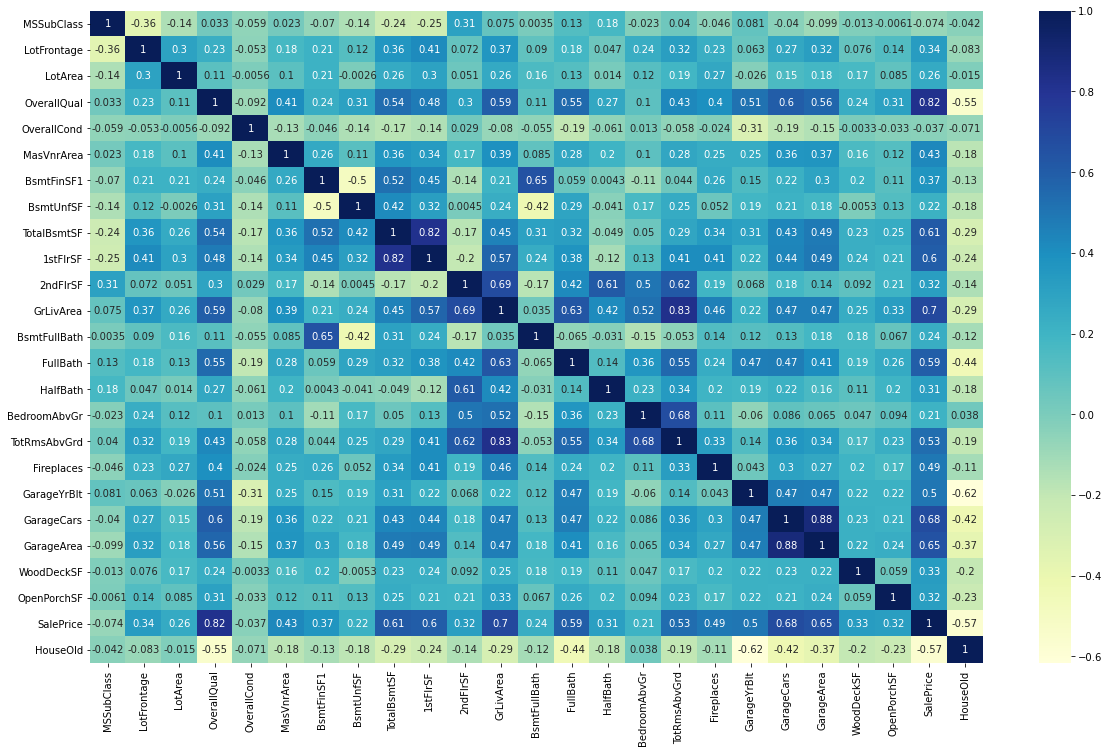

In [44]:
#Let's check the correlation coefficients using HeatMap. 
plt.figure(figsize = (20, 12))
sns.heatmap(hp.corr(), annot = True, cmap="YlGnBu")
plt.yticks(rotation=0)
plt.show()

Based on above heat-map below are the highly correlated features
- `TotalBsmtSF` and `1stFlrSF` have 82% correlation
- `TotRmsAbvGrd` and `GrLivArea` have 83% correlation
- `GarageCars` and `GarageArea` have 88% correlation
As both we cannot remove so let’s drop `1stFlrSF`, `TotRmsAbvGrd` and `GarageArea`.

In [45]:
hp.drop(['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea'], axis=1, inplace=True)

In [46]:
# numFeatures columns
numFeatures = list(hp.select_dtypes(['int64', 'float64']))
numFeatures

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice',
 'HouseOld']

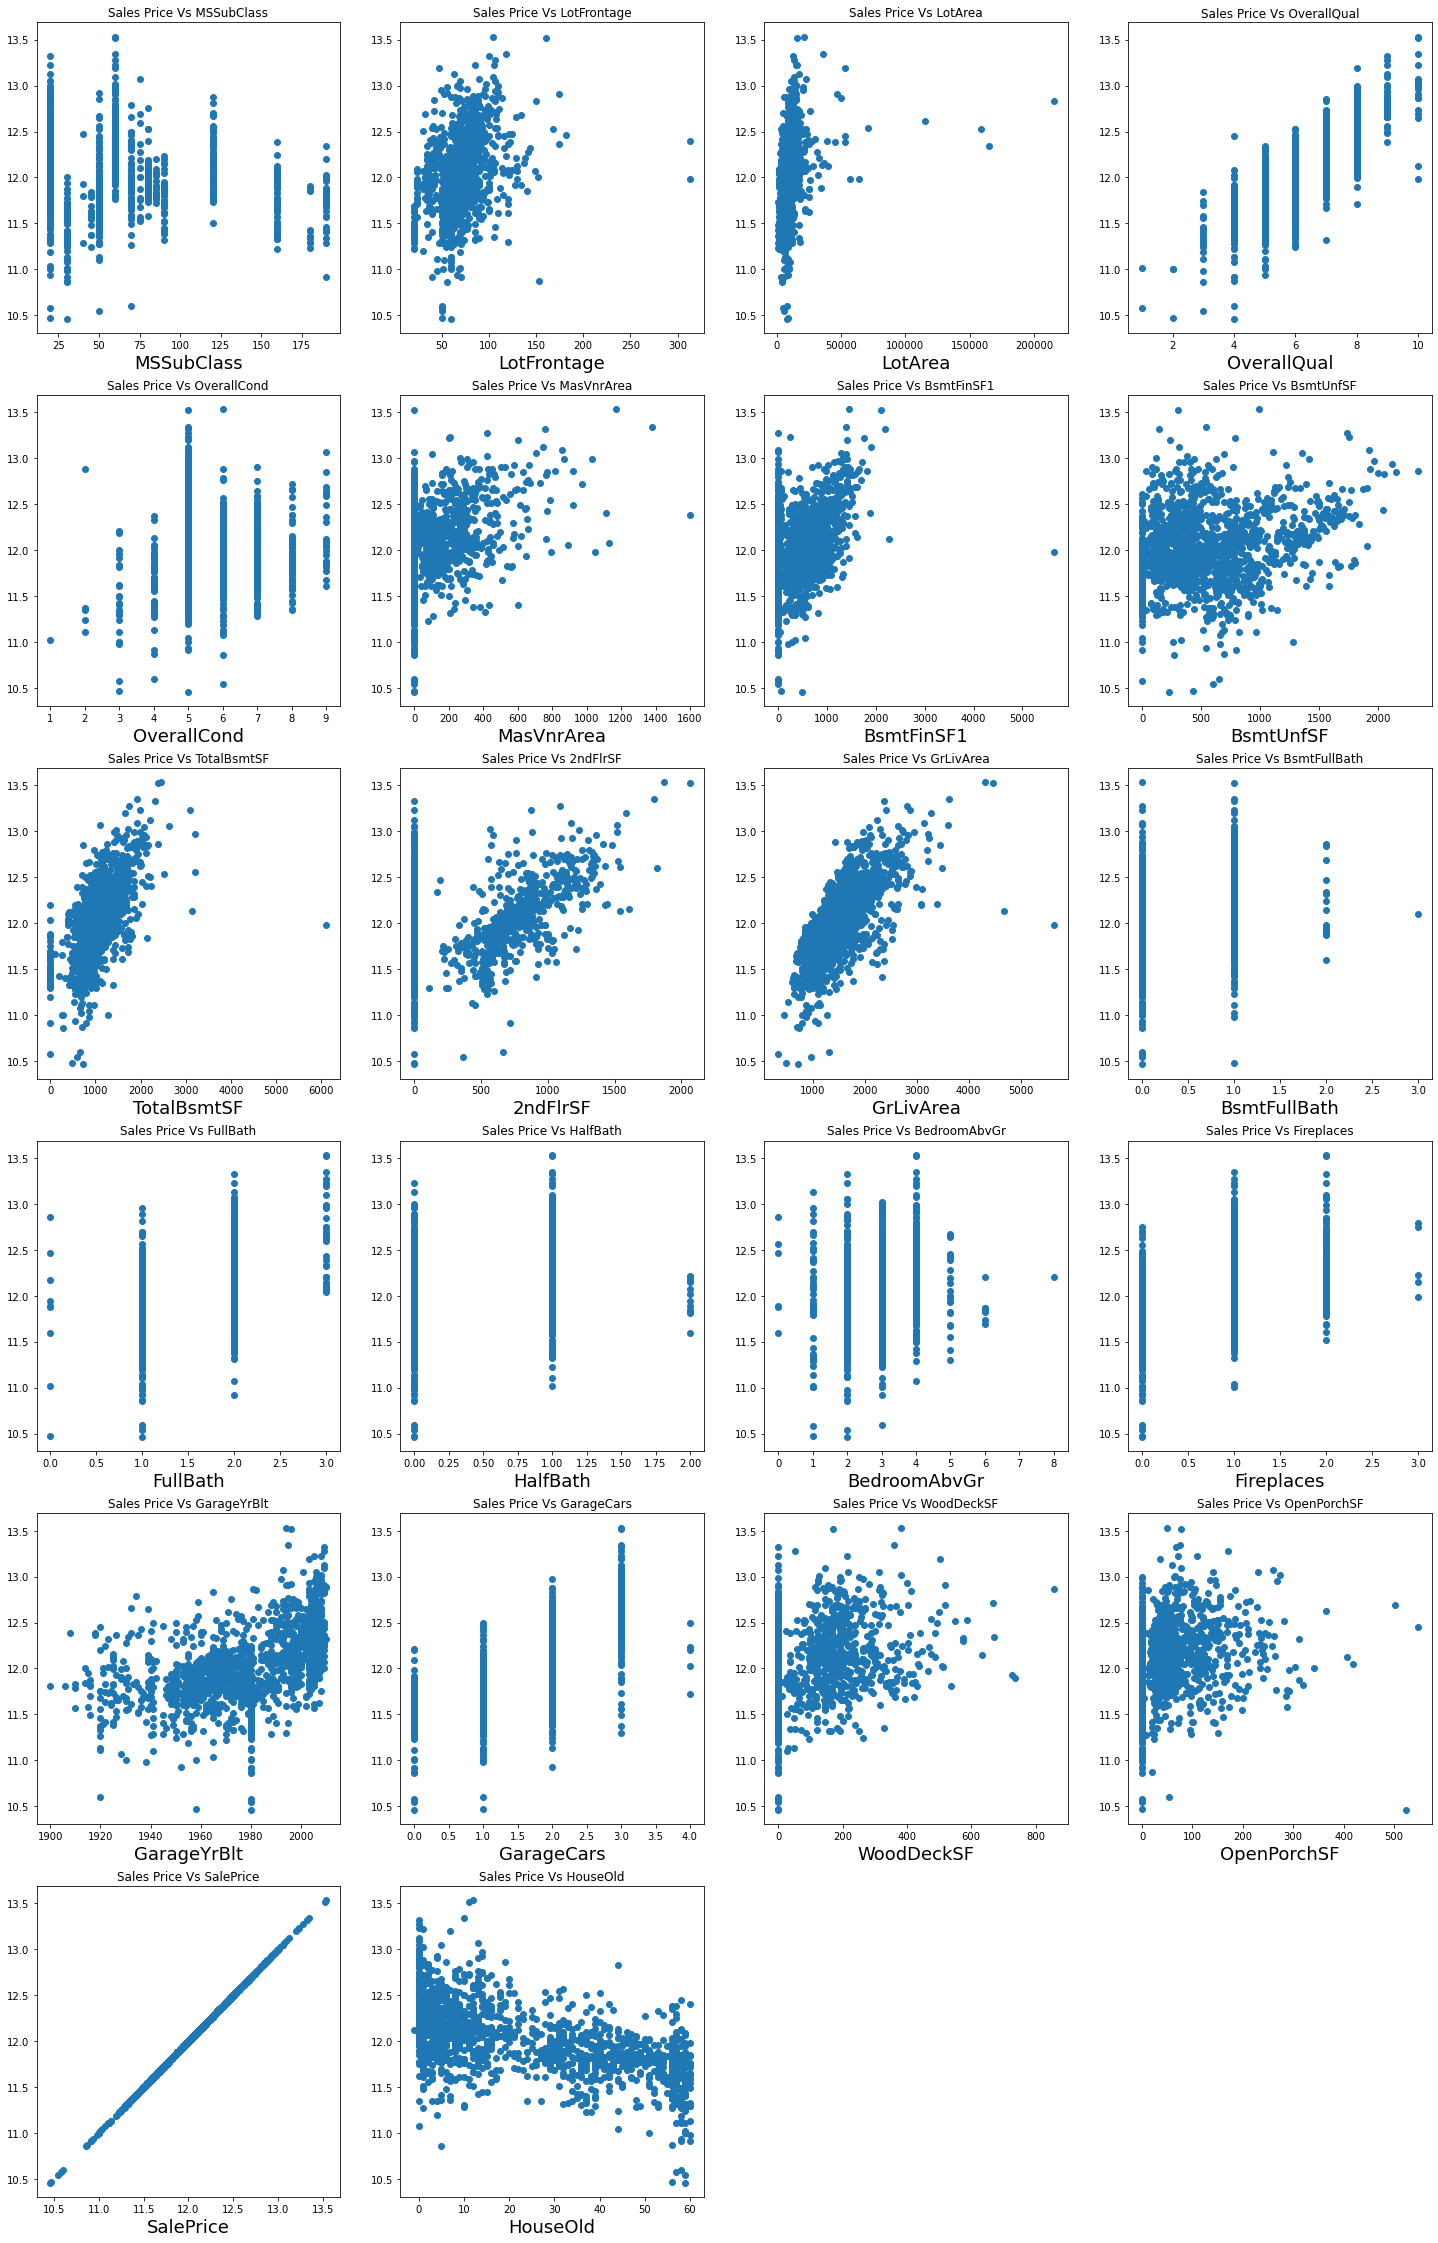

In [48]:
#let’s plot a graph using scatter plot for all numFeatures data with target variable 'SalePrice'

plt.figure(figsize=(25,40))
for i, j in enumerate(numFeatures):
    plt.subplot(6,4,i+1)
    plt.scatter(hp[j], hp['SalePrice'])
    plt.xlabel(j,fontsize=18)
    plt.title("Sales Price Vs " + j)
plt.show()

In [49]:
#catFeatures columns
catFeatures = list(hp.select_dtypes('object'))
catFeatures

['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'SaleCondition']

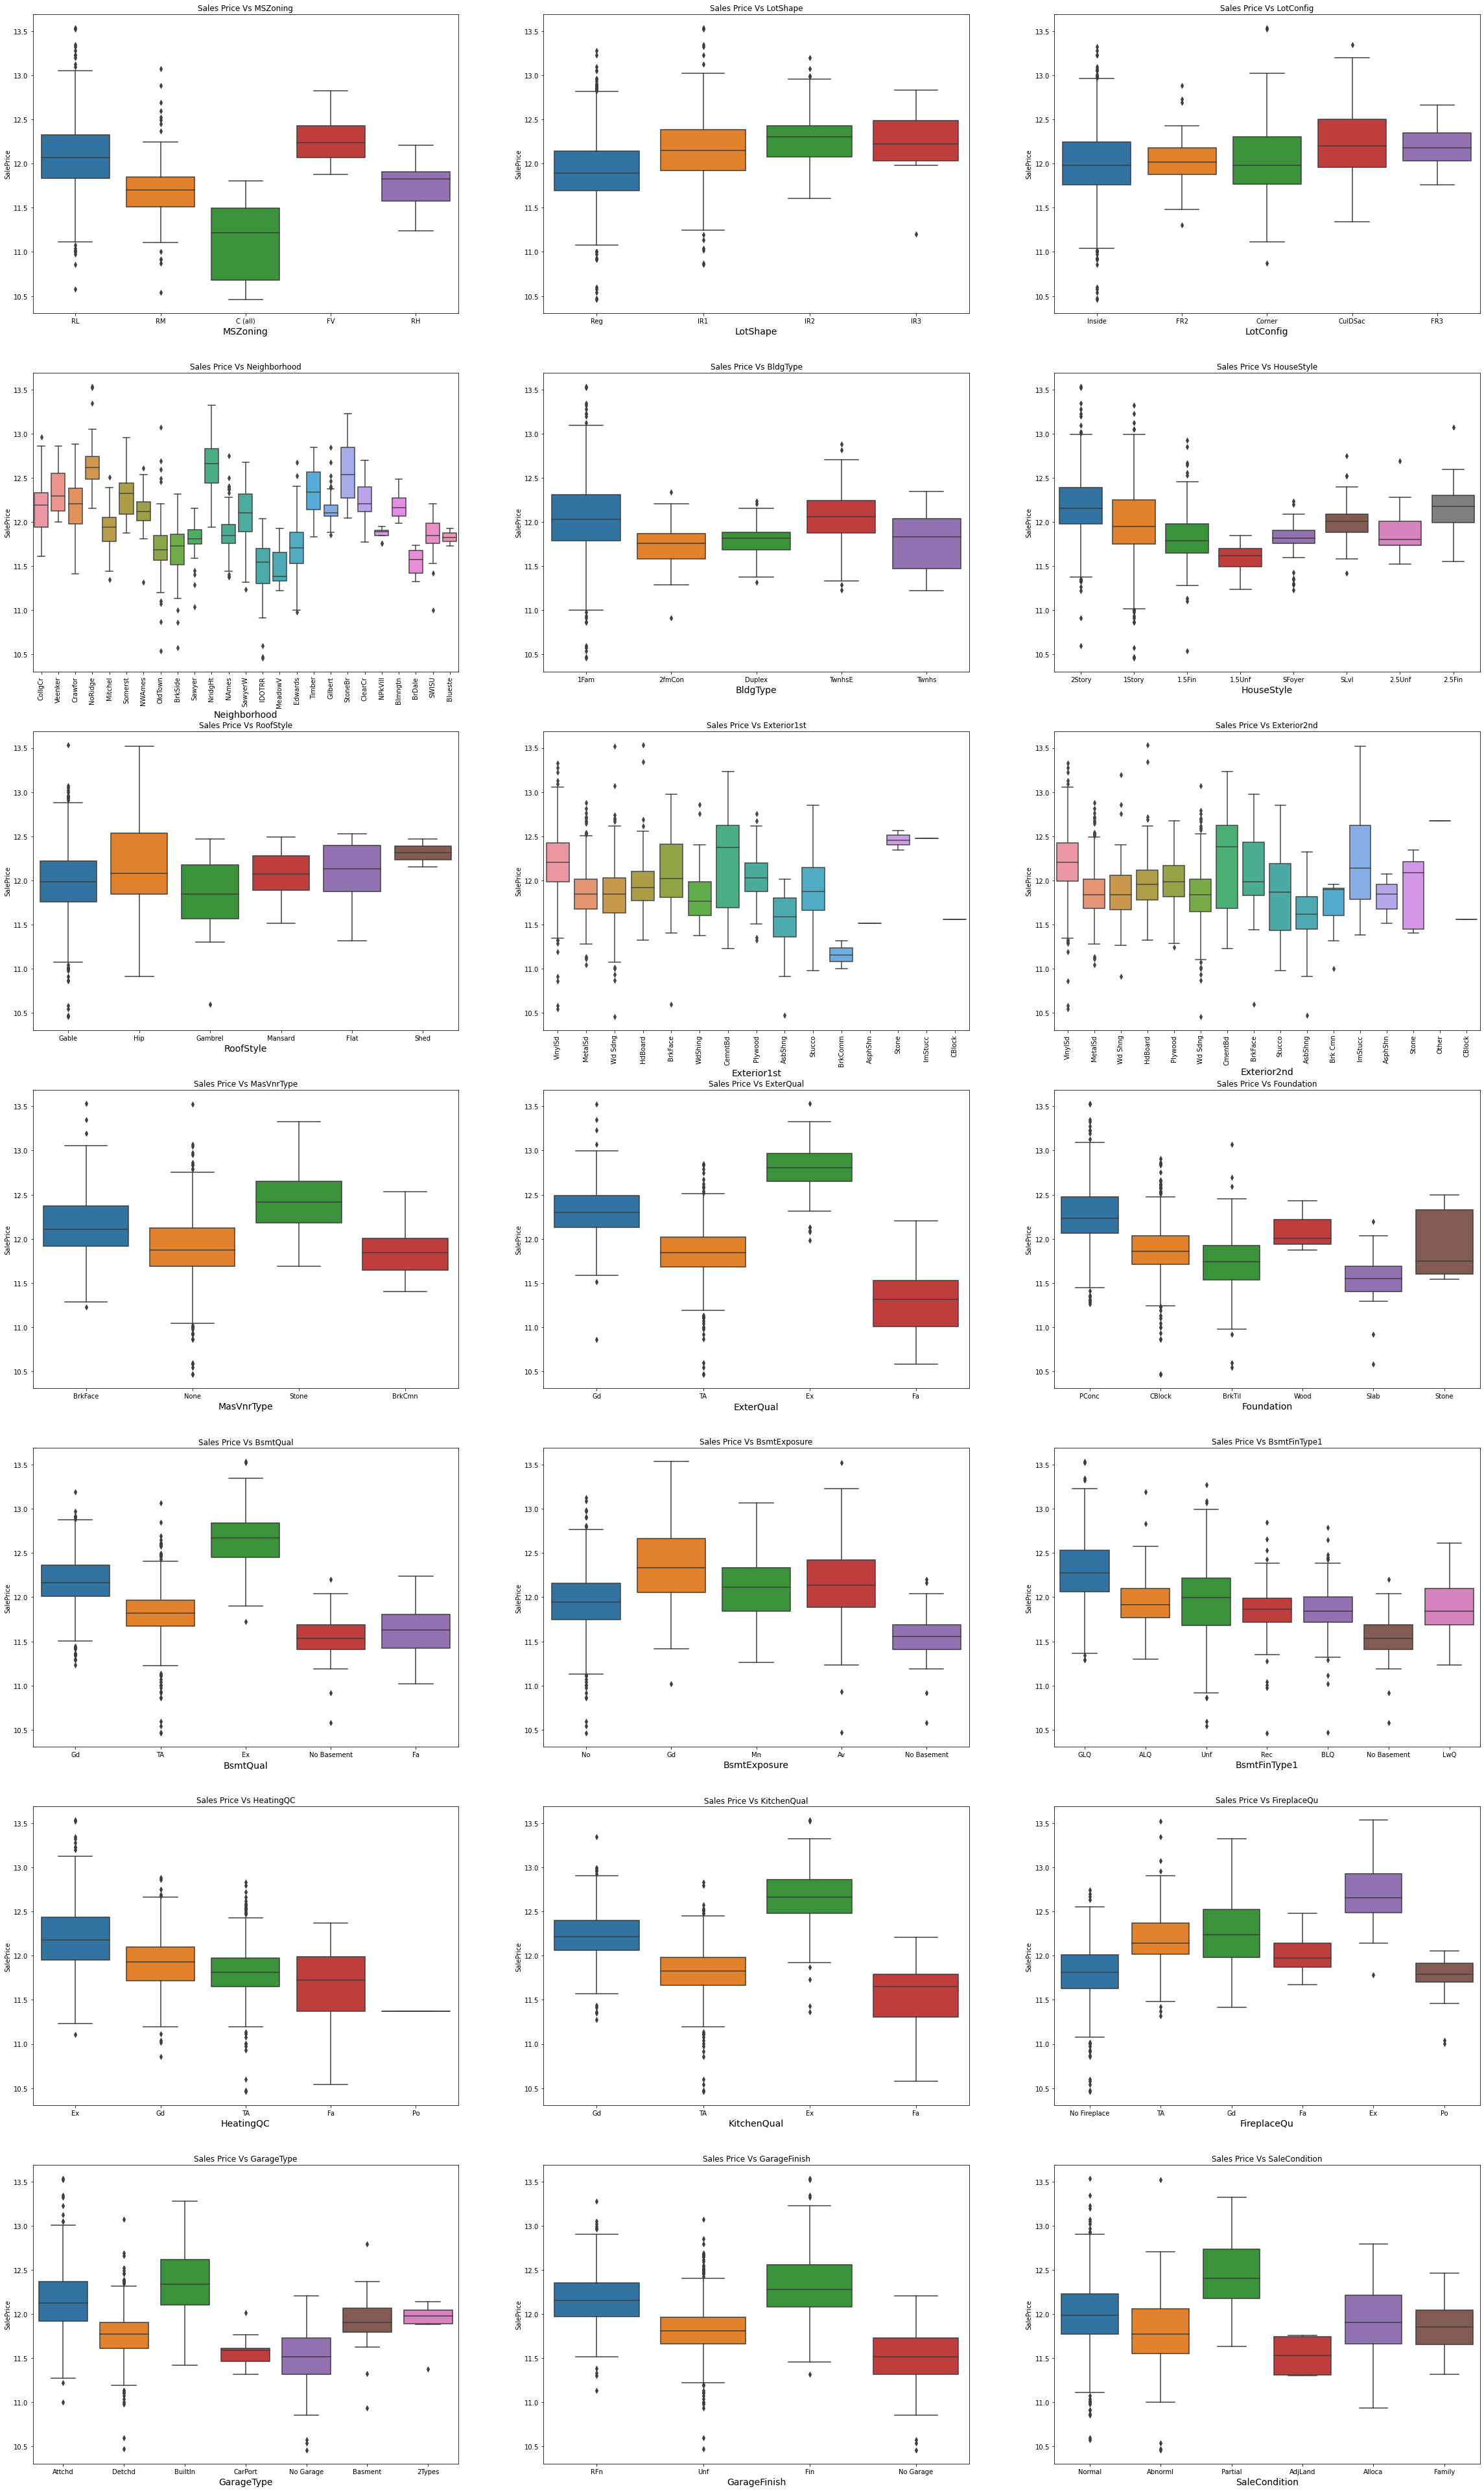

In [50]:
#Avoid repetation code so creating function for displaying box plot
plt.figure(figsize=(40,100))
for m, n in enumerate(catFeatures):
    plt.subplot(10, 3, (m+1))
    sns.boxplot(x=n, y='SalePrice',data=hp)
    plt.xlabel(n, fontsize=14)
    plt.title("Sales Price Vs " + n)
    if n == "Neighborhood" or n == "Exterior1st" or n == "Exterior2nd":
        plt.xticks(rotation=90)
plt.show()

## 3.Data preparation

- In order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s. So let's do it for all columns which is having string values by using `Dummy Variable` concept.
- But before that, it is always better option to convert ordered categorical variable into numeric type rather than converting them into dummies as they add value to our model.

In [51]:
hp.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'WoodDeckSF',
       'OpenPorchSF', 'SaleCondition', 'SalePrice', 'HouseOld'],
      dtype='object')

In [52]:
print("****************LotShape**************")
print(hp.LotShape.value_counts())
print("\n\n****************ExterQual**************")
print(hp.ExterQual.value_counts())
print("\n\n****************BsmtQual**************")
print(hp.BsmtQual.value_counts())
print("\n\n****************BsmtExposure**************")
print(hp.BsmtExposure.value_counts())
print("\n\n****************BsmtFinType1**************")
print(hp.BsmtFinType1.value_counts())
print("\n\n****************HeatingQC**************")
print(hp.HeatingQC.value_counts())
print("\n\n****************KitchenQual**************")
print(hp.KitchenQual.value_counts())
print("\n\n****************FireplaceQu**************")
print(hp.FireplaceQu.value_counts())
print("\n\n****************GarageFinish**************")
print(hp.GarageFinish.value_counts())

****************LotShape**************
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


****************ExterQual**************
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64


****************BsmtQual**************
TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64


****************BsmtExposure**************
No             953
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64


****************BsmtFinType1**************
Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64


****************HeatingQC**************
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64


****************KitchenQual**************
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dt

**Below are the ordered categorical variables which need to be converted to numerical values:**
- `LotShape`: General shape of property
- `ExterQual`: Evaluates the quality of the material on the exterior 
- `BsmtQual`: Evaluates the height of the basement
- `BsmtExposure`: Refers to walkout or garden level walls
- `BsmtFinType1`: Rating of basement finished area
- `HeatingQC`: Heating quality and condition
- `KitchenQual`: Kitchen quality
- `FireplaceQu`: Fireplace quality
- `GarageFinish`: Interior finish of the garage

In [54]:
#mapping is based on the data dictionaty for LotShape
hp['LotShape'] = hp['LotShape'].map({'Reg':3,'IR1':2,'IR2':1,'IR3':0})

#mapping is based on the data dictionaty for ExterQual
hp['ExterQual'] = hp['ExterQual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

#mapping is based on the data dictionaty for BsmtQual
hp['BsmtQual'] = hp['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':0})

##mapping is based on  on the data dictionaty for BsmtExposure
hp['BsmtExposure'] = hp['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0})

##mapping is based on  on the data dictionaty for BsmtFinType1
hp['BsmtFinType1'] = hp['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0})

##mapping is based on  on the data dictionaty
hp['HeatingQC'] = hp['HeatingQC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

##mapping is based on  on the data dictionaty for KitchenQual
hp['KitchenQual'] = hp['KitchenQual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

##mapping is based on  on the data dictionaty for FireplaceQu
hp['FireplaceQu'] = hp['FireplaceQu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Fireplace':0})

##mapping is based on  on the data dictionaty for GarageFinish
hp['GarageFinish'] = hp['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'No Garage':0})

In [55]:
hp.head()

MSSubClass MSZoning  LotFrontage  LotArea  LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450         3    Inside      CollgCr   
1          20       RL         80.0     9600         3       FR2      Veenker   
2          60       RL         68.0    11250         2    Inside      CollgCr   
3          70       RL         60.0     9550         2    Corner      Crawfor   
4          60       RL         84.0    14260         2       FR2      NoRidge   

  BldgType HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st  \
0     1Fam     2Story            7            5     Gable     VinylSd   
1     1Fam     1Story            6            8     Gable     MetalSd   
2     1Fam     2Story            7            5     Gable     VinylSd   
3     1Fam     2Story            7            5     Gable     Wd Sdng   
4     1Fam     2Story            8            5     Gable     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  \
0     VinylSd    BrkFace       196.0          3      PConc         4   
1     MetalSd       None         0.0          2     CBlock         4   
2     VinylSd    BrkFace       162.0          3      PConc         4   
3     Wd Shng       None         0.0          2     BrkTil         3   
4     VinylSd    BrkFace       350.0          3      PConc         4   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0             1             6         706        150          856          4   
1             4             5         978        284         1262          4   
2             2             6         486        434          920          4   
3             1             5         216        540          756          3   
4             3             6         655        490         1145          4   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0       854       1710             1         2         1             3   
1         0       1262             0         2         0             3   
2       866       1786             1         2         1             3   
3       756       1717             1         1         0             3   
4      1053       2198             1         2         1             4   

   KitchenQual  Fireplaces  FireplaceQu GarageType  GarageYrBlt  GarageFinish  \
0            3           0            0     Attchd       2003.0             2   
1            2           1            3     Attchd       1976.0             2   
2            3           1            3     Attchd       2001.0             2   
3            3           1            4     Detchd       1998.0             1   
4            3           1            3     Attchd       2000.0             2   

   GarageCars  WoodDeckSF  OpenPorchSF SaleCondition  SalePrice  HouseOld  
0           2           0           61        Normal      12.25         5  
1           2         298            0        Normal      12.11        31  
2           2           0           42        Normal      12.32         6  
3           3           0           35       Abnorml      11.85        36  
4           3         192           84        Normal      12.43         8

In [56]:
#Describe the data of hp dataframe
hp.describe([0.25,0.50,0.75,0.90,0.99])

MSSubClass  LotFrontage    LotArea  LotShape  OverallQual  OverallCond  \
count      1460.0      1460.00    1460.00   1460.00      1460.00      1460.00   
mean         56.9        69.86   10516.83      2.59         6.10         5.58   
std          42.3        22.03    9981.26      0.58         1.38         1.11   
min          20.0        21.00    1300.00      0.00         1.00         1.00   
25%          20.0        60.00    7553.50      2.00         5.00         5.00   
50%          50.0        69.00    9478.50      3.00         6.00         5.00   
75%          70.0        79.00   11601.50      3.00         7.00         6.00   
90%         120.0        92.00   14381.70      3.00         8.00         7.00   
99%         190.0       137.41   37567.64      3.00        10.00         9.00   
max         190.0       313.00  215245.00      3.00        10.00         9.00   

       MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  \
count     1460.00    1460.00   1460.00       1460.00       1460.00   
mean       103.69       2.40      3.49          1.63          3.55   
std        180.57       0.57      0.88          1.07          2.11   
min          0.00       1.00      0.00          0.00          0.00   
25%          0.00       2.00      3.00          1.00          1.00   
50%          0.00       2.00      4.00          1.00          4.00   
75%        164.25       3.00      4.00          2.00          6.00   
90%        335.00       3.00      4.00          3.00          6.00   
99%        791.28       4.00      5.00          4.00          6.00   
max       1600.00       4.00      5.00          4.00          6.00   

       BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  HeatingQC  2ndFlrSF  GrLivArea  \
count     1460.00    1460.00      1460.00    1460.00   1460.00    1460.00   
mean       443.64     567.24      1057.43       3.15    346.99    1515.46   
std        456.10     441.87       438.71       0.96    436.53     525.48   
min          0.00       0.00         0.00       0.00      0.00     334.00   
25%          0.00     223.00       795.75       2.00      0.00    1129.50   
50%        383.50     477.50       991.50       4.00      0.00    1464.00   
75%        712.25     808.00      1298.25       4.00    728.00    1776.75   
90%       1065.50    1232.00      1602.20       4.00    954.20    2158.30   
99%       1572.41    1797.05      2155.05       4.00   1418.92    3123.48   
max       5644.00    2336.00      6110.00       4.00   2065.00    5642.00   

       BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  \
count       1460.00   1460.00   1460.00       1460.00      1460.00   
mean           0.43      1.57      0.38          2.87         2.51   
std            0.52      0.55      0.50          0.82         0.66   
min            0.00      0.00      0.00          0.00         1.00   
25%            0.00      1.00      0.00          2.00         2.00   
50%            0.00      2.00      0.00          3.00         2.00   
75%            1.00      2.00      1.00          3.00         3.00   
90%            1.00      2.00      1.00          4.00         3.00   
99%            2.00      3.00      1.00          5.00         4.00   
max            3.00      3.00      2.00          8.00         4.00   

       Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  \
count     1460.00      1460.00      1460.00       1460.00     1460.00   
mean         0.61         1.83      1978.59          1.72        1.77   
std          0.64         1.81        24.00          0.89        0.75   
min          0.00         0.00      1900.00          0.00        0.00   
25%          0.00         0.00      1962.00          1.00        1.00   
50%          1.00         2.00      1980.00          2.00        2.00   
75%          1.00         4.00      2001.00          2.00        2.00   
90%          1.00         4.00      2006.00          3.00        3.00   
99%          2.00         5.00      2009.00          3.00        3.0

In [57]:
catFeatures = hp.select_dtypes('object').columns
catFeatures

Index(['MSZoning', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'GarageType', 'SaleCondition'],
      dtype='object')

In [58]:
#get dummies for unordered categorical columns.

for j in catFeatures:
    dummy_df = pd.get_dummies(hp[j], prefix=j, drop_first=True)   
    hp = pd.concat([hp, dummy_df], axis=1)
    hp.drop(j, axis=1, inplace=True)   #Dropping main column name as it is not required after dummy variable creation.

In [59]:
hp.head()

MSSubClass  LotFrontage  LotArea  LotShape  OverallQual  OverallCond  \
0          60         65.0     8450         3            7            5   
1          20         80.0     9600         3            6            8   
2          60         68.0    11250         2            7            5   
3          70         60.0     9550         2            7            5   
4          60         84.0    14260         2            8            5   

   MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0       196.0          3         4             1             6         706   
1         0.0          2         4             4             5         978   
2       162.0          3         4             2             6         486   
3         0.0          2         3             1             5         216   
4       350.0          3         4             3             6         655   

   BsmtUnfSF  TotalBsmtSF  HeatingQC  2ndFlrSF  GrLivArea  BsmtFullBath  \
0        150          856          4       854       1710             1   
1        284         1262          4         0       1262             0   
2        434          920          4       866       1786             1   
3        540          756          3       756       1717             1   
4        490         1145          4      1053       2198             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenQual  Fireplaces  FireplaceQu  \
0         2         1             3            3           0            0   
1         2         0             3            2           1            3   
2         2         1             3            3           1            3   
3         1         0             3            3           1            4   
4         2         1             4            3           1            3   

   GarageYrBlt  GarageFinish  GarageCars  WoodDeckSF  OpenPorchSF  SalePrice  \
0       2003.0             2           2           0           61      12.25   
1       1976.0             2           2         298            0      12.11   
2       2001.0             2           2           0           42      12.32   
3       1998.0             1           3           0           35      11.85   
4       2000.0             2           3         192           84      12.43   

   HouseOld  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0         5            0            0            1            0   
1        31            0            0            1            0   
2         6            0            0            1            0   
3        36            0            0            1            0   
4         8            0            0            1            0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   N

In [60]:
hp.shape

(1460, 127)

In [61]:
#Describe the data of hp dataframe
hp.describe([0.25,0.50,0.75,0.90,0.99])

MSSubClass  LotFrontage    LotArea  LotShape  OverallQual  OverallCond  \
count      1460.0      1460.00    1460.00   1460.00      1460.00      1460.00   
mean         56.9        69.86   10516.83      2.59         6.10         5.58   
std          42.3        22.03    9981.26      0.58         1.38         1.11   
min          20.0        21.00    1300.00      0.00         1.00         1.00   
25%          20.0        60.00    7553.50      2.00         5.00         5.00   
50%          50.0        69.00    9478.50      3.00         6.00         5.00   
75%          70.0        79.00   11601.50      3.00         7.00         6.00   
90%         120.0        92.00   14381.70      3.00         8.00         7.00   
99%         190.0       137.41   37567.64      3.00        10.00         9.00   
max         190.0       313.00  215245.00      3.00        10.00         9.00   

       MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  \
count     1460.00    1460.00   1460.00       1460.00       1460.00   
mean       103.69       2.40      3.49          1.63          3.55   
std        180.57       0.57      0.88          1.07          2.11   
min          0.00       1.00      0.00          0.00          0.00   
25%          0.00       2.00      3.00          1.00          1.00   
50%          0.00       2.00      4.00          1.00          4.00   
75%        164.25       3.00      4.00          2.00          6.00   
90%        335.00       3.00      4.00          3.00          6.00   
99%        791.28       4.00      5.00          4.00          6.00   
max       1600.00       4.00      5.00          4.00          6.00   

       BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  HeatingQC  2ndFlrSF  GrLivArea  \
count     1460.00    1460.00      1460.00    1460.00   1460.00    1460.00   
mean       443.64     567.24      1057.43       3.15    346.99    1515.46   
std        456.10     441.87       438.71       0.96    436.53     525.48   
min          0.00       0.00         0.00       0.00      0.00     334.00   
25%          0.00     223.00       795.75       2.00      0.00    1129.50   
50%        383.50     477.50       991.50       4.00      0.00    1464.00   
75%        712.25     808.00      1298.25       4.00    728.00    1776.75   
90%       1065.50    1232.00      1602.20       4.00    954.20    2158.30   
99%       1572.41    1797.05      2155.05       4.00   1418.92    3123.48   
max       5644.00    2336.00      6110.00       4.00   2065.00    5642.00   

       BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  \
count       1460.00   1460.00   1460.00       1460.00      1460.00   
mean           0.43      1.57      0.38          2.87         2.51   
std            0.52      0.55      0.50          0.82         0.66   
min            0.00      0.00      0.00          0.00         1.00   
25%            0.00      1.00      0.00          2.00         2.00   
50%            0.00      2.00      0.00          3.00         2.00   
75%            1.00      2.00      1.00          3.00         3.00   
90%            1.00      2.00      1.00          4.00         3.00   
99%            2.00      3.00      1.00          5.00         4.00   
max            3.00      3.00      2.00          8.00         4.00   

       Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  \
count     1460.00      1460.00      1460.00       1460.00     1460.00   
mean         0.61         1.83      1978.59          1.72        1.77   
std          0.64         1.81        24.00          0.89        0.75   
min          0.00         0.00      1900.00          0.00        0.00   
25%          0.00         0.00      1962.00          1.00        1.00   
50%          1.00         2.00      1980.00          2.00        2.00   
75%          1.00         4.00      2001.00          2.00        2.00   
90%          1.00         4.00      2006.00          3.00        3.00   
99%          2.00         5.00      2009.00          3.00        3.0

In [62]:
#train-test split.
np.random.seed(0)
hp_train, hp_test = train_test_split(hp, train_size = 0.7, random_state = 100)

In [63]:
hp_train.shape

(1021, 127)

In [65]:
hp_train.describe([0.25,0.50,0.75,0.90,0.99])

MSSubClass  LotFrontage    LotArea  LotShape  OverallQual  OverallCond  \
count     1021.00      1021.00    1021.00   1021.00      1021.00      1021.00   
mean        58.47        69.57   10489.96      2.59         6.09         5.58   
std         43.30        22.09   10308.06      0.60         1.40         1.09   
min         20.00        21.00    1477.00      0.00         1.00         1.00   
25%         20.00        60.00    7449.00      2.00         5.00         5.00   
50%         50.00        69.00    9505.00      3.00         6.00         5.00   
75%         70.00        78.00   11512.00      3.00         7.00         6.00   
90%        120.00        92.00   14215.00      3.00         8.00         7.00   
99%        190.00       140.40   36352.00      3.00        10.00         9.00   
max        190.00       313.00  215245.00      3.00        10.00         9.00   

       MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  \
count     1021.00    1021.00   1021.00       1021.00       1021.00   
mean       104.90       2.40      3.48          1.66          3.59   
std        187.23       0.57      0.90          1.09          2.11   
min          0.00       1.00      0.00          0.00          0.00   
25%          0.00       2.00      3.00          1.00          1.00   
50%          0.00       2.00      4.00          1.00          4.00   
75%        158.00       3.00      4.00          3.00          6.00   
90%        336.00       3.00      4.00          3.00          6.00   
99%        855.20       4.00      5.00          4.00          6.00   
max       1600.00       4.00      5.00          4.00          6.00   

       BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  HeatingQC  2ndFlrSF  GrLivArea  \
count     1021.00    1021.00       1021.0    1021.00   1021.00    1021.00   
mean       448.17     563.75       1062.0       3.15    343.54    1518.15   
std        465.12     448.74        459.1       0.97    435.50     531.85   
min          0.00       0.00          0.0       0.00      0.00     438.00   
25%          0.00     216.00        793.0       2.00      0.00    1135.00   
50%        392.00     462.00        994.0       4.00      0.00    1466.00   
75%        712.00     806.00       1314.0       4.00    728.00    1774.00   
90%       1065.00    1240.00       1610.0       4.00    941.00    2149.00   
99%       1599.40    1772.80       2157.0       4.00   1424.40    3177.60   
max       5644.00    2336.00       6110.0       4.00   2065.00    5642.00   

       BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  \
count       1021.00   1021.00   1021.00       1021.00      1021.00   
mean           0.44      1.57      0.38          2.86         2.51   
std            0.53      0.55      0.50          0.82         0.66   
min            0.00      0.00      0.00          0.00         1.00   
25%            0.00      1.00      0.00          2.00         2.00   
50%            0.00      2.00      0.00          3.00         2.00   
75%            1.00      2.00      1.00          3.00         3.00   
90%            1.00      2.00      1.00          4.00         3.00   
99%            2.00      3.00      1.00          5.00         4.00   
max            3.00      3.00      2.00          8.00         4.00   

       Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  \
count     1021.00      1021.00      1021.00       1021.00     1021.00   
mean         0.60         1.80      1978.86          1.71        1.77   
std          0.65         1.83        23.95          0.90        0.75   
min          0.00         0.00      1900.00          0.00        0.00   
25%          0.00         0.00      1963.00          1.00        1.00   
50%          1.00         2.00      1980.00          2.00        2.00   
75%          1.00         4.00      2001.00          2.00        2.00   
90%          1.00         4.00      2006.00          3.00        3.00   
99%          2.00         5.00      2009.00          3.00        3.0

In [64]:
hp_test.shape

(439, 127)

In [66]:
# Rescaling the features by #Creating MinMaxScaler instance
scaler = MinMaxScaler()

In [67]:
# Apply scaler() to all the columns except the '0 or 1' and 'dummy' variables
num_vars = hp_train.select_dtypes(include=['int64','float64']).columns

#Fit and Transform Train Data
hp_train[num_vars] = scaler.fit_transform(hp_train[num_vars])

#Transform Test Data
hp_test[num_vars] = scaler.transform(hp_test[num_vars])

In [68]:
hp_train.head()

MSSubClass  LotFrontage  LotArea  LotShape  OverallQual  OverallCond  \
318         0.24         0.24     0.04       1.0         0.67         0.50   
239         0.18         0.11     0.03       1.0         0.56         0.38   
986         0.18         0.13     0.02       1.0         0.56         0.88   
1416        1.00         0.13     0.05       1.0         0.33         0.62   
390         0.18         0.10     0.03       1.0         0.44         0.88   

      MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
318         0.16       0.67       0.8          1.00          1.00        0.17   
239         0.00       0.33       0.6          0.25          0.33        0.02   
986         0.00       0.33       0.6          0.25          0.17        0.00   
1416        0.00       0.33       0.6          0.25          0.17        0.00   
390         0.00       0.33       0.6          0.25          0.50        0.04   

      BsmtUnfSF  TotalBsmtSF  HeatingQC  2ndFlrSF  GrLivArea  BsmtFullBath  \
318        0.15         0.22       1.00      0.62       0.42          0.33   
239        0.27         0.12       0.50      0.33       0.20          0.00   
986        0.21         0.08       0.75      0.31       0.23          0.00   
1416       0.33         0.13       0.75      0.51       0.36          0.00   
390        0.10         0.14       1.00      0.20       0.18          0.33   

      FullBath  HalfBath  BedroomAbvGr  KitchenQual  Fireplaces  FireplaceQu  \
318       0.67       0.5          0.50         0.67        0.33          0.6   
239       0.33       0.5          0.38         0.33        0.33          0.8   
986       0.33       0.0          0.25         0.67        0.00          0.0   
1416      0.67       0.0          0.50         0.33        0.00          0.0   
390       0.33       0.0          0.50         0.33        0.00          0.0   

      GarageYrBlt  GarageFinish  GarageCars  WoodDeckSF  OpenPorchSF  \
318          0.85          0.67        0.75        0.40         0.11   
239          0.45          0.33        0.25        0.00         0.27   
986          0.45          0.33        0.25        0.46         0.00   
1416         0.65          0.33        0.50        0.00         0.00   
390          0.71          0.33        0.25        0.00         0.25   

      SalePrice  HouseOld  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
318        0.65      0.28            0            0            1            0   
239        0.38      1.00            0            0            1            0   
986        0.39      0.07            0            0            0            1   
1416       0.41      1.00            0            0            0            1   
390        0.40      0.97            0            0            1            0   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
318                   0              0              0                 1   
239                   0              0              0                 1   
986                   0              0              0                 0   
1416                  0              0              0                 1   
390                   0              0              0                 1   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
318                      0                    0                     0   
239                      0                    0                     0   
986                      0                    0                     0   
1416                     0                    0                     0   
390                      0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
318                      0                     0                     0   
239                      0                     0                     0   
986                      0                     0                    

In [69]:
hp_train.describe([0.25,0.50,0.75,0.90,0.99])

MSSubClass  LotFrontage  LotArea  LotShape  OverallQual  OverallCond  \
count     1021.00      1021.00  1021.00   1021.00      1021.00      1021.00   
mean         0.23         0.17     0.04      0.86         0.57         0.57   
std          0.25         0.08     0.05      0.20         0.16         0.14   
min          0.00         0.00     0.00      0.00         0.00         0.00   
25%          0.00         0.13     0.03      0.67         0.44         0.50   
50%          0.18         0.16     0.04      1.00         0.56         0.50   
75%          0.29         0.20     0.05      1.00         0.67         0.62   
90%          0.59         0.24     0.06      1.00         0.78         0.75   
99%          1.00         0.41     0.16      1.00         1.00         1.00   
max          1.00         1.00     1.00      1.00         1.00         1.00   

       MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  \
count     1021.00    1021.00   1021.00       1021.00       1021.00   
mean         0.07       0.47      0.70          0.42          0.60   
std          0.12       0.19      0.18          0.27          0.35   
min          0.00       0.00      0.00          0.00          0.00   
25%          0.00       0.33      0.60          0.25          0.17   
50%          0.00       0.33      0.80          0.25          0.67   
75%          0.10       0.67      0.80          0.75          1.00   
90%          0.21       0.67      0.80          0.75          1.00   
99%          0.53       1.00      1.00          1.00          1.00   
max          1.00       1.00      1.00          1.00          1.00   

       BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  HeatingQC  2ndFlrSF  GrLivArea  \
count     1021.00    1021.00      1021.00    1021.00   1021.00    1021.00   
mean         0.08       0.24         0.17       0.79      0.17       0.21   
std          0.08       0.19         0.08       0.24      0.21       0.10   
min          0.00       0.00         0.00       0.00      0.00       0.00   
25%          0.00       0.09         0.13       0.50      0.00       0.13   
50%          0.07       0.20         0.16       1.00      0.00       0.20   
75%          0.13       0.35         0.22       1.00      0.35       0.26   
90%          0.19       0.53         0.26       1.00      0.46       0.33   
99%          0.28       0.76         0.35       1.00      0.69       0.53   
max          1.00       1.00         1.00       1.00      1.00       1.00   

       BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  \
count       1021.00   1021.00   1021.00       1021.00      1021.00   
mean           0.15      0.52      0.19          0.36         0.50   
std            0.18      0.18      0.25          0.10         0.22   
min            0.00      0.00      0.00          0.00         0.00   
25%            0.00      0.33      0.00          0.25         0.33   
50%            0.00      0.67      0.00          0.38         0.33   
75%            0.33      0.67      0.50          0.38         0.67   
90%            0.33      0.67      0.50          0.50         0.67   
99%            0.67      1.00      0.50          0.62         1.00   
max            1.00      1.00      1.00          1.00         1.00   

       Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  \
count     1021.00      1021.00      1021.00       1021.00     1021.00   
mean         0.20         0.36         0.72          0.57        0.44   
std          0.22         0.37         0.22          0.30        0.19   
min          0.00         0.00         0.00          0.00        0.00   
25%          0.00         0.00         0.57          0.33        0.25   
50%          0.33         0.40         0.73          0.67        0.50   
75%          0.33         0.80         0.92          0.67        0.50   
90%          0.33         0.80         0.96          1.00        0.75   
99%          0.67         1.00         0.99          1.00        0.75   
max          1.00

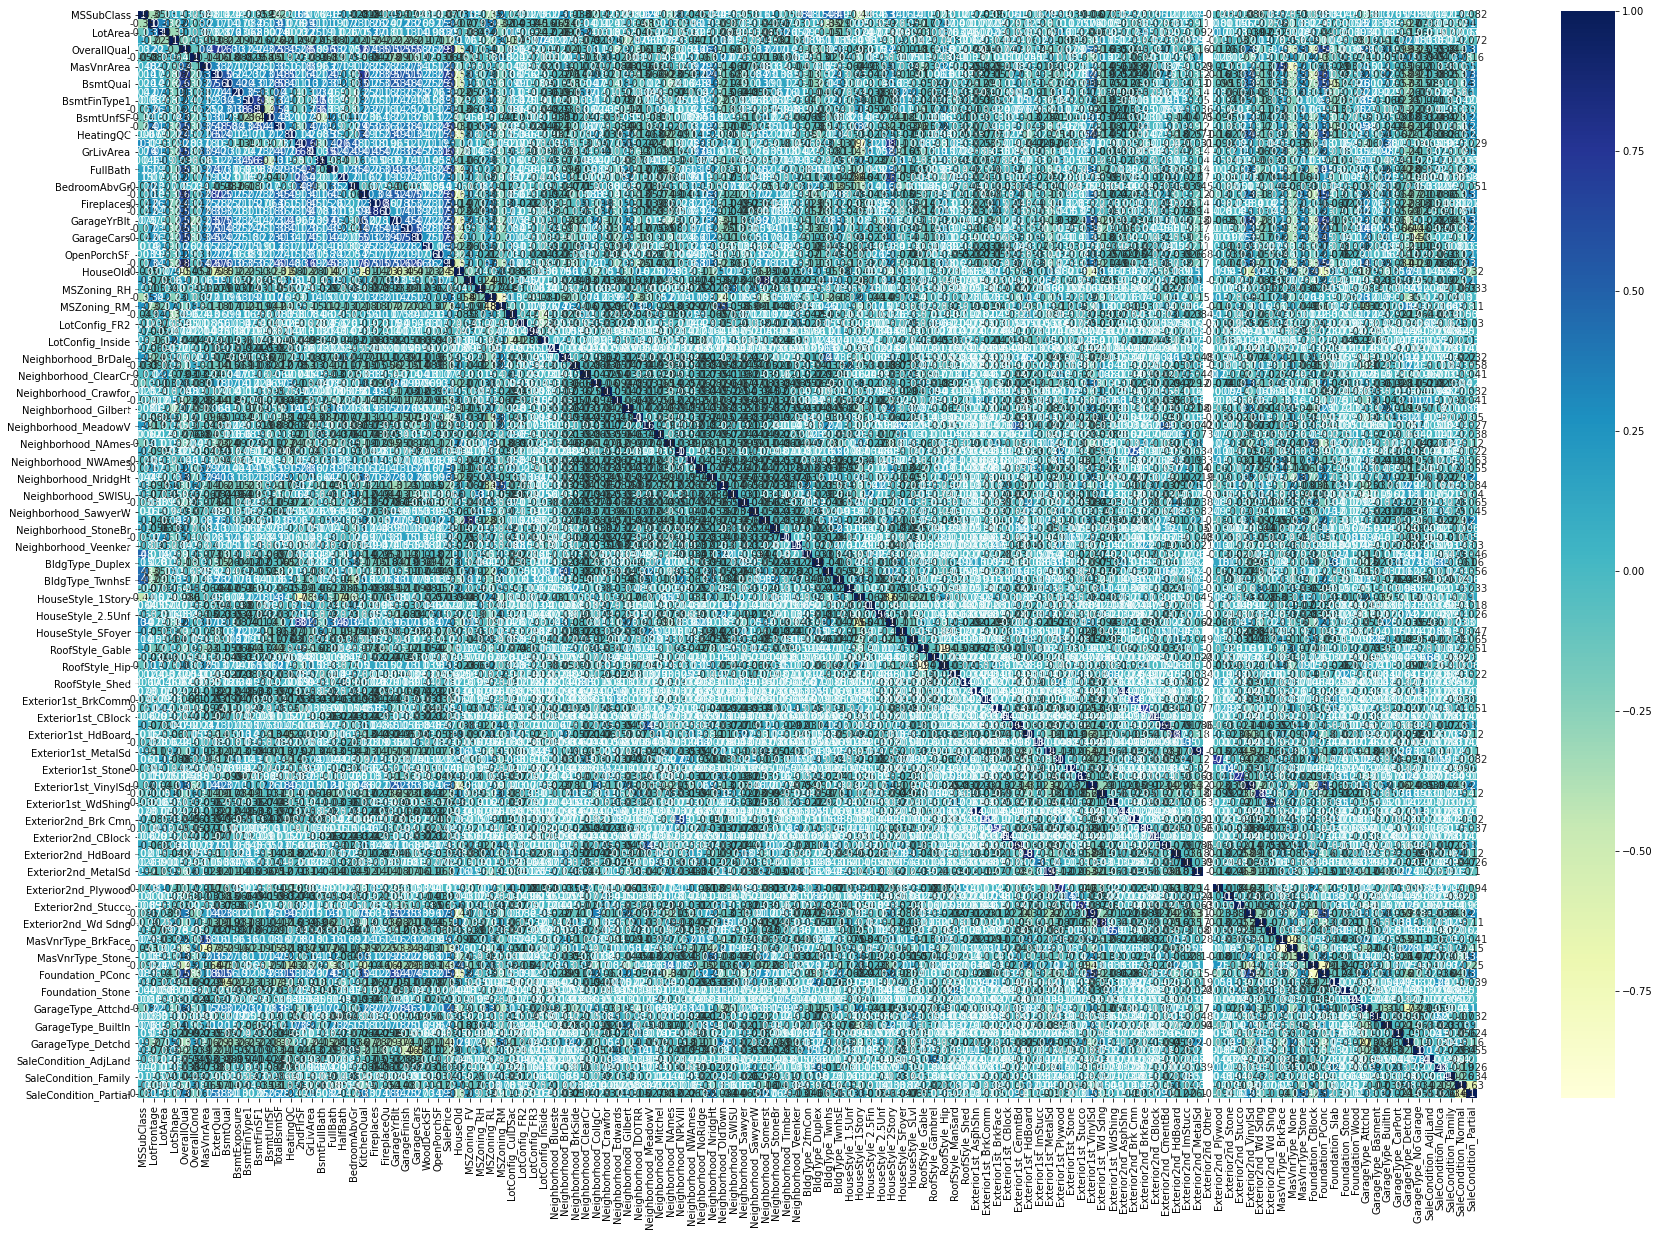

In [70]:
plt.figure(figsize = (30, 20))
sns.heatmap(hp_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Due to unreadable, this is difficult to find out which variable is performing well, henceforth we will choose RFE to get best 50 features out of 127.
Also we know target variable is `SalePrice` henceforth we will conider this as `X_train`

In [72]:
#Get X and y for Train data
y_train = hp_train.pop('SalePrice')
X_train = hp_train

#Get X and y for Test Data
y_test = hp_test.pop('SalePrice')
X_test = hp_test

In [73]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1021, 126)
X_test shape:  (439, 126)
y_train shape:  (1021,)
y_test shape:  (439,)


# 4. Model building and evaluation

**`Recursive Feature Elimination (RFE)`** we will choose best 50 variable in RFE model

In [74]:
#Creating an object of linear Regression
hp_lm = LinearRegression()

In [75]:
#Fitting a model
hp_lm.fit(X_train,y_train)

#So we will be eliminating columns using RFE in a set of 50 features. 

hp_rfe = RFE(hp_lm, 50)

hp_rfe = hp_rfe.fit(X_train,y_train)

`Below are the variable selected by RFE`

In [76]:
#Display columns selected by RFE and their weights.
rfe_temp = pd.DataFrame(list(zip(X_train.columns, hp_rfe.support_,hp_rfe.ranking_)), columns=['Feature', 'RFE_Support', 'RFE_Ranking']).sort_values(by='RFE_Ranking')
rfe_temp = rfe_temp.loc[rfe_temp['RFE_Ranking'] == 1]
rfe_temp.reset_index(drop=True, inplace=True)
rfe_temp

Feature  RFE_Support  RFE_Ranking
0              MSSubClass         True            1
1              WoodDeckSF         True            1
2     Exterior2nd_AsphShn         True            1
3                HouseOld         True            1
4             MSZoning_FV         True            1
5             MSZoning_RH         True            1
6             MSZoning_RL         True            1
7             MSZoning_RM         True            1
8      Exterior1st_CBlock         True            1
9           LotConfig_FR2         True            1
10          LotConfig_FR3         True            1
11    Exterior1st_BrkFace         True            1
12    Exterior1st_BrkComm         True            1
13      HouseStyle_2.5Fin         True            1
14   Neighborhood_ClearCr         True            1
15         BldgType_Twnhs         True            1
16   Neighborhood_Crawfor         True            1
17   Neighborhood_Edwards         True            1
18   Neighborhood_Veenker         True            1
19   Neighborhood_StoneBr         True            1
20   Neighborhood_MeadowV         True            1
21   Neighborhood_Somerst         True            1
22             GarageCars         True            1
23   Neighborhood_NridgHt         True            1
24           GarageFinish         True            1
25            FireplaceQu         True            1
26            LotFrontage         True            1
27                LotArea         True            1
28  SaleCondition_AdjLand         True            1
29            OverallQual         True            1
30            OverallCond         True            1
31        Foundation_Wood         True            1
32       Foundation_Stone         True            1
33               BsmtQual         True            1
34           BsmtExposure         True            1
35           BsmtFinType1         True            1
36     Exterior2nd_CBlock         True            1
37             BsmtFinSF1         True            1
38       Foundation_PConc         True            1
39              HeatingQC         True            1
40      Foundation_CBlock         True            1
41              GrLivArea         True            1
42           BsmtFullBath         True            1
43               FullBath         True            1
44    Exterior2nd_Wd Shng         True            1
45           BedroomAbvGr         True            1
46            KitchenQual         True            1
47     Exterior2nd_Stucco         True            1
48        Foundation_Slab         True            1
49   Neighborhood_NoRidge         True            1

In [77]:
rfeFeatures = X_train.columns[hp_rfe.support_]
rfeFeatures

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'HeatingQC',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenQual',
       'FireplaceQu', 'GarageFinish', 'GarageCars', 'WoodDeckSF', 'HouseOld',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'BldgType_Twnhs',
       'HouseStyle_2.5Fin', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock',
       'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'SaleConditi

In [78]:
X_train_new = X_train[rfeFeatures]
X_test_new = X_test[rfeFeatures]
print("X_train_new shape with 50 features: ", X_train_new.shape)
print("X_test_new shape with 50 features: ", X_test_new.shape)
print("y_train shape with 50 features: ", y_train.shape)
print("y_test shape with 50 features: ", y_test.shape)

X_train_new shape with 50 features:  (1021, 50)
X_test_new shape with 50 features:  (439, 50)
y_train shape with 50 features:  (1021,)
y_test shape with 50 features:  (439,)


In [79]:
#Let's fit new Train and find R2 score for them.

hp_lm.fit(X_train_new, y_train)

LinearRegression()

In [80]:
#Let's display coefficient and intercept.
print(hp_lm.intercept_)
print(hp_lm.coef_)

-0.053510730711216814
[-0.04657939 -0.08025053  0.11472099  0.17861892  0.07647302  0.06283675
  0.03028359  0.02633416 -0.0185764   0.02163063  0.33411057  0.04784625
  0.03541384  0.05377917  0.01965064  0.02736045  0.02362244  0.07645336
  0.01895777 -0.02407928  0.14344806  0.15103411  0.15108585  0.12460834
 -0.02014723 -0.01998342  0.0351467   0.05212277 -0.02384955 -0.02373238
  0.04099307  0.05247773  0.04116313  0.04531922  0.04022683 -0.01835545
 -0.02669277 -0.07674907  0.0262727  -0.02315042  0.02846919 -0.02315042
 -0.03331971 -0.03042129  0.02372615  0.02600423  0.05197511  0.05352647
  0.04610464  0.01614986]


In [81]:
#Creating a function which will print R2 Score, RSS, MSE and RMSE for both Train and Test Data
def calculate_metric(y_train, y_train_pred, y_test, y_test_pred):
    
    metric = []

    r2_train_lr = r2_score(y_train, y_train_pred)
    print('Train R2 score: ', r2_train_lr)
    metric.append(r2_train_lr)

    r2_test_lr = r2_score(y_test, y_test_pred)
    print('Test R2 score: ', r2_test_lr)
    metric.append(r2_test_lr)

    rss1_lr = np.sum(np.square(y_train - y_train_pred))
    print('Train RSS score: ', rss1_lr)
    metric.append(rss1_lr)

    rss2_lr = np.sum(np.square(y_test - y_test_pred))
    print('Test RSS score: ', rss2_lr)
    metric.append(rss2_lr)

    mse_train_lr = mean_squared_error(y_train, y_train_pred)
    print('Train MSE score: ', mse_train_lr)
    metric.append(mse_train_lr)

    mse_test_lr = mean_squared_error(y_test, y_test_pred)
    print('Test MSE score: ', mse_test_lr)
    metric.append(mse_test_lr)

    rmse_train_lr = mse_train_lr**0.5
    print('Train RMSE score: ', rmse_train_lr)
    metric.append(rmse_train_lr)

    rmse_test_lr = mse_test_lr**0.5
    print('Test RMSE score: ', rmse_test_lr)
    metric.append(rmse_test_lr)
    
    return metric

In [82]:
y_train_pred = hp_lm.predict(X_train_new)
y_test_pred = hp_lm.predict(X_test_new)

print("****************Data without Regularization********************")
metric1 = calculate_metric(y_train, y_train_pred, y_test, y_test_pred)
print("***************************************************************")

****************Data without Regularization********************
Train R2 score:  0.9032503902206447
Test R2 score:  0.8799087154050169
Train RSS score:  1.642482704573391
Test RSS score:  0.9193887429884304
Train MSE score:  0.0016087000044793251
Test MSE score:  0.0020942795967845798
Train RMSE score:  0.04010860262436632
Test RMSE score:  0.045763299671074634
***************************************************************


**`Regularization using Ridge Regression`**

In [83]:
parm = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = parm, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.0s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [85]:
# Printing the best hyperparameter alpha
print("Ridge Best param: ", ridge_model_cv.best_params_)
print("Ridge Best Score: ", ridge_model_cv.best_score_)
print("Ridge Best estimator: ", ridge_model_cv.best_estimator_)
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']]

Ridge Best param:  {'alpha': 1.0}
Ridge Best Score:  0.8790653043491969
Ridge Best estimator:  Ridge()


param_alpha  mean_train_score  mean_test_score  rank_test_score
0       0.0001              0.91             0.87               16
1        0.001              0.91             0.87               15
2         0.01              0.91             0.87               14
3         0.05              0.91             0.88               13
4          0.1              0.91             0.88               12
5          0.2              0.91             0.88               10
6          0.3              0.91             0.88                9
7          0.4              0.90             0.88                8
8          0.5              0.90             0.88                7
9          0.6              0.90             0.88                5
10         0.7              0.90             0.88                4
11         0.8              0.90             0.88                3
12         0.9              0.90             0.88                2
13           1              0.90             0.88                1
14           2              0.90             0.88                6
15           3              0.89             0.88               11
16           4              0.89             0.87               17
17           5              0.89             0.87               18
18           6              0.88             0.87               19
19           7              0.88             0.87               20
20           8              0.88             0.87               21
21           9              0.88             0.86               22
22          10              0.87             0.86               23
23          20              0.85             0.84               24
24          50              0.81             0.80               25
25         100              0.75             0.75               26
26         500              0.52             0.51               27
27        1000              0.37             0.36               28

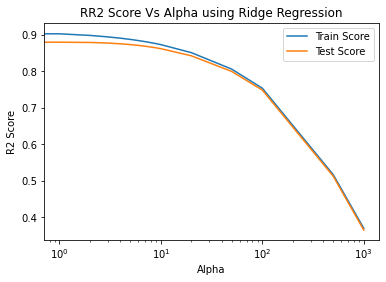

In [87]:
# plotting mean test and train scores with alpha 

# Converting the 'param_alpha' datatype from object to int
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# Plotting R2 Score of Train score
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])

# Plotting R2 Score of Test score
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])

plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title("RR2 Score Vs Alpha using Ridge Regression")
plt.legend(['Train Score', 'Test Score'], loc='upper right')
plt.xscale('log')
plt.show()

**<font color="maroon">Based on above data for Ridge Regression best Alpha Value is `"1"` for processing.</font>**

In [88]:
#Fitting Ridge model for alpha = 2 and printing coefficients which have been penalised
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[-0.03983613 -0.04149271  0.07919382  0.17982696  0.0751596   0.05831423
  0.02922576  0.02336783  0.0058247   0.02151062  0.2559286   0.04597275
  0.04914846  0.07120919  0.02615291  0.03156592  0.0244415   0.07827761
  0.02391522 -0.02596803  0.08533998  0.09139923  0.09796564  0.07113335
 -0.01996565 -0.01615566  0.03838389  0.05125421 -0.02298309 -0.02211612
  0.04529404  0.04866044  0.04162971  0.04286531  0.03804962 -0.0164226
 -0.00945822 -0.0476244   0.0277357  -0.01395717  0.0127586  -0.01395717
 -0.02753168 -0.02874479  0.02006066  0.02286787  0.04132828  0.03858649
  0.0339915   0.01051387]


In [89]:
y_train_pred = ridge.predict(X_train_new)
y_test_pred = ridge.predict(X_test_new)

print("****************Data after Ridge Regression********************")
metric2 = calculate_metric(y_train, y_train_pred, y_test, y_test_pred)
print("***************************************************************")

****************Data after Ridge Regression********************
Train R2 score:  0.9005526373691902
Test R2 score:  0.8786892452448849
Train RSS score:  1.6882814670679667
Test RSS score:  0.9287247005595143
Train MSE score:  0.001653556774797225
Test MSE score:  0.002115546014941946
Train RMSE score:  0.04066394932611963
Test RMSE score:  0.045995065115096274
***************************************************************


**<font color="blue">We have a good `train score` `90.05`% and good `test score` as well `87.86`%.  </font>**

In [91]:
#Top 10 feature of Ridge Regression

ridge_param_df = pd.DataFrame({'Features':X_train_new.columns, 'Coeficient':ridge.coef_})
(ridge_param_df.sort_values('Coeficient', ascending=False)).head(10)

Features  Coeficient
10     GrLivArea        0.26
3    OverallQual        0.18
22   MSZoning_RL        0.10
21   MSZoning_RH        0.09
20   MSZoning_FV        0.09
2        LotArea        0.08
17    GarageCars        0.08
4    OverallCond        0.08
13  BedroomAbvGr        0.07
23   MSZoning_RM        0.07

**`Regularization using Lasso Regression`**

In [92]:
# list of alphas to tune

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [93]:
# Printing the best hyperparameter alpha
print("Lasso Best param: ", lasso_model_cv.best_params_)
print("Lasso Best Score: ", lasso_model_cv.best_score_)
print("Lasso Best estimator: ", lasso_model_cv.best_estimator_)
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']]

Lasso Best param:  {'alpha': 0.0001}
Lasso Best Score:  0.8756728839623122
Lasso Best estimator:  Lasso(alpha=0.0001)


param_alpha  mean_train_score  mean_test_score  rank_test_score
0       0.0001              0.90         8.76e-01                1
1        0.001              0.86         8.49e-01                2
2         0.01              0.53         5.25e-01                3
3         0.05              0.00        -6.87e-03                4
4          0.1              0.00        -6.87e-03                4
5          0.2              0.00        -6.87e-03                4
6          0.3              0.00        -6.87e-03                4
7          0.4              0.00        -6.87e-03                4
8          0.5              0.00        -6.87e-03                4
9          0.6              0.00        -6.87e-03                4
10         0.7              0.00        -6.87e-03                4
11         0.8              0.00        -6.87e-03                4
12         0.9              0.00        -6.87e-03                4
13           1              0.00        -6.87e-03                4
14           2              0.00        -6.87e-03                4
15           3              0.00        -6.87e-03                4
16           4              0.00        -6.87e-03                4
17           5              0.00        -6.87e-03                4
18           6              0.00        -6.87e-03                4
19           7              0.00        -6.87e-03                4
20           8              0.00        -6.87e-03                4
21           9              0.00        -6.87e-03                4
22          10              0.00        -6.87e-03                4
23          20              0.00        -6.87e-03                4
24          50              0.00        -6.87e-03                4
25         100              0.00        -6.87e-03                4
26         500              0.00        -6.87e-03                4
27        1000              0.00        -6.87e-03                4

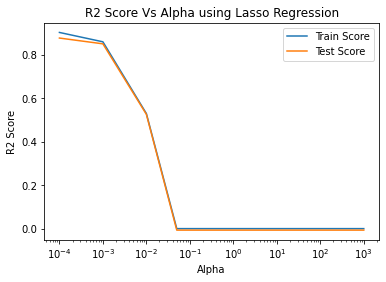

In [94]:
# plotting mean test and train scores with alpha 

# Converting the 'param_alpha' datatype from object to float
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# Plotting R2 Score of Train score
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])

# Plotting R2 Score of Test score
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])

plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score Vs Alpha using Lasso Regression")
plt.legend(['Train Score', 'Test Score'], loc='upper right')
plt.xscale('log')
plt.show()

**<font color="maroon">Based on above data for Lasso Regression best Alpha Value is `"0.0001"` for processing.</font>**

In [95]:
# list of alphas to tune

params = {'alpha': [0.0001, 0.001, 0.01]}

lasso = Lasso()

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='r2', verbose=1)

In [96]:
# Printing the best hyperparameter alpha
print("Lasso Best param: ", lasso_model_cv.best_params_)
print("Lasso Best Score: ", lasso_model_cv.best_score_)
print("Lasso Best estimator: ", lasso_model_cv.best_estimator_)
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']]

Lasso Best param:  {'alpha': 0.0001}
Lasso Best Score:  0.8756728839623122
Lasso Best estimator:  Lasso(alpha=0.0001)


param_alpha  mean_train_score  mean_test_score  rank_test_score
0      0.0001              0.90             0.88                1
1       0.001              0.86             0.85                2
2        0.01              0.53             0.53                3

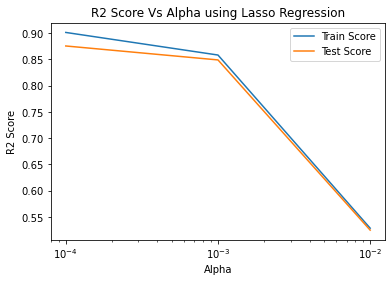

In [97]:
# plotting mean test and train scores with alpha 

# Converting the 'param_alpha' datatype from object to float
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# Plotting R2 Score of Train score
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])

# Plotting R2 Score of Test score
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])

plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score Vs Alpha using Lasso Regression")
plt.legend(['Train Score', 'Test Score'], loc='upper right')
plt.xscale('log')
plt.show()

In [98]:
#Fitting lasso model for alpha = 0.0001 and printing coefficients which have been penalised
alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_new, y_train)
print(lasso.coef_)

[-0.03913381 -0.03002782  0.05913359  0.19361293  0.07251853  0.04802013
  0.02848102  0.02437129  0.          0.01964591  0.30888369  0.04564937
  0.03855266  0.04604426  0.02117059  0.02854138  0.02261065  0.07888569
  0.01962699 -0.02724422  0.07926272  0.0816348   0.09191377  0.06044355
 -0.0133209  -0.          0.03446863  0.04515028 -0.02359959 -0.00727353
  0.03606738  0.0441598   0.03812495  0.0329253   0.02935258 -0.01381865
 -0.         -0.02031398  0.02669863 -0.          0.         -0.
 -0.02771389 -0.0249457   0.0155092   0.01938272  0.02713294  0.01023575
  0.          0.        ]


In [99]:
y_train_pred = lasso.predict(X_train_new)
y_test_pred = lasso.predict(X_test_new)

print("****************Data after Lasso Regression********************")
metric3 = calculate_metric(y_train, y_train_pred, y_test, y_test_pred)
print("***************************************************************")

****************Data after Lasso Regression********************
Train R2 score:  0.8988979831077045
Test R2 score:  0.8820421330422554
Train RSS score:  1.7163719266857045
Test RSS score:  0.9030558328494044
Train MSE score:  0.0016810694678606312
Test MSE score:  0.0020570747900897596
Train RMSE score:  0.04100084716027989
Test RMSE score:  0.04535498638617103
***************************************************************


**<font color="blue">We have a good `train score` `89.88`% and good `test score` as well `88.20`%.  </font>**

In [100]:
#Top 10 feature of Lasso Regression

lasso_param_df = pd.DataFrame({'Features':X_train_new.columns, 'Coeficient':lasso.coef_})
(lasso_param_df.sort_values('Coeficient', ascending=False)).head(10)

Features  Coeficient
10    GrLivArea        0.31
3   OverallQual        0.19
22  MSZoning_RL        0.09
21  MSZoning_RH        0.08
20  MSZoning_FV        0.08
17   GarageCars        0.08
4   OverallCond        0.07
23  MSZoning_RM        0.06
2       LotArea        0.06
5      BsmtQual        0.05

In [101]:
# Let's compare all metrics by creating a table which will contain all together

lr_table = {'Metrics': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)', 
                        'RMSE (Train)','RMSE (Test)'], 
            'Linear Regression': metric1
           }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metrics', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metrics  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           9.03e-01          9.01e-01          8.99e-01
1   R2 Score (Test)           8.80e-01          8.79e-01          8.82e-01
2       RSS (Train)           1.64e+00          1.69e+00          1.72e+00
3        RSS (Test)           9.19e-01          9.29e-01          9.03e-01
4       MSE (Train)           1.61e-03          1.65e-03          1.68e-03
5        MSE (Test)           2.09e-03          2.12e-03          2.06e-03
6      RMSE (Train)           4.01e-02          4.07e-02          4.10e-02
7       RMSE (Test)           4.58e-02          4.60e-02          4.54e-02

## observe the changes in the coefficients after regularization

In [102]:
betas = pd.DataFrame(index=X_train_new.columns)

In [103]:
betas.rows = X_train_new.columns

In [105]:
betas['Linear'] = hp_lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [106]:
pd.set_option('display.max_rows', None)
betas.head(50)

Linear     Ridge     Lasso
MSSubClass              -0.05 -3.98e-02 -3.91e-02
LotFrontage             -0.08 -4.15e-02 -3.00e-02
LotArea                  0.11  7.92e-02  5.91e-02
OverallQual              0.18  1.80e-01  1.94e-01
OverallCond              0.08  7.52e-02  7.25e-02
BsmtQual                 0.06  5.83e-02  4.80e-02
BsmtExposure             0.03  2.92e-02  2.85e-02
BsmtFinType1             0.03  2.34e-02  2.44e-02
BsmtFinSF1              -0.02  5.82e-03  0.00e+00
HeatingQC                0.02  2.15e-02  1.96e-02
GrLivArea                0.33  2.56e-01  3.09e-01
BsmtFullBath             0.05  4.60e-02  4.56e-02
FullBath                 0.04  4.91e-02  3.86e-02
BedroomAbvGr             0.05  7.12e-02  4.60e-02
KitchenQual              0.02  2.62e-02  2.12e-02
FireplaceQu              0.03  3.16e-02  2.85e-02
GarageFinish             0.02  2.44e-02  2.26e-02
GarageCars               0.08  7.83e-02  7.89e-02
WoodDeckSF               0.02  2.39e-02  1.96e-02
HouseOld                -0.02 -2.60e-02 -2.72e-02
MSZoning_FV              0.14  8.53e-02  7.93e-02
MSZoning_RH              0.15  9.14e-02  8.16e-02
MSZoning_RL              0.15  9.80e-02  9.19e-02
MSZoning_RM              0.12  7.11e-02  6.04e-02
LotConfig_FR2           -0.02 -2.00e-02 -1.33e-02
LotConfig_FR3           -0.02 -1.62e-02 -0.00e+00
Neighborhood_ClearCr     0.04  3.84e-02  3.45e-02
Neighborhood_Crawfor     0.05  5.13e-02  4.52e-02
Neighborhood_Edwards    -0.02 -2.30e-02 -2.36e-02
Neighborhood_MeadowV    -0.02 -2.21e-02 -7.27e-03
Neighborhood_NoRidge     0.04  4.53e-02  3.61e-02
Neighborhood_NridgHt     0.05  4.87e-02  4.42e-02
Neighborhood_Somerst     0.04  4.16e-02  3.81e-02
Neighborhood_StoneBr     0.05  4.29e-02  3.29e-02
Neighborhood_Veenker     0.04  3.80e-02  2.94e-02
BldgType_Twnhs          -0.02 -1.64e-02 -1.38e-02
HouseStyle_2.5Fin       -0.03 -9.46e-03 -0.00e+00
Exterior1st_BrkComm     -0.08 -4.76e-02 -2.03e-02
Exterior1st_BrkFace      0.03  2.77e-02  2.67e-02
Exterior1st_CBlock      -0.02 -1.40e-02 -0.00e+00
Exterior2nd_AsphShn      0.03  1.28e-02  0.00e+00
Exterior2nd_CBlock      -0.02 -1.40e-02 -0.00e+00
Exterior2nd_Stucco      -0.03 -2.75e-02 -2.77e-02
Exterior2nd_Wd Shng     -0.03 -2.87e-02 -2.49e-02
Foundation_CBlock        0.02  2.01e-02  1.55e-02
Foundation_PConc         0.03  2.29e-02  1.94e-02
Foundation_Slab          0.05  4.13e-02  2.71e-02
Foundation_Stone         0.05  3.86e-02  1.02e-02
Foundation_Wood          0.05  3.40e-02  0.00e+00
SaleCondition_AdjLand    0.02  1.05e-02  0.00e+00

## 5.Residual analysis

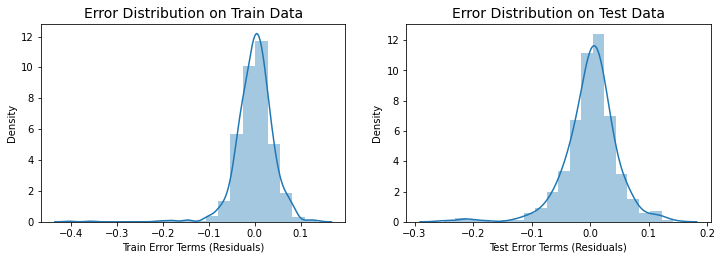

In [107]:
plt.figure(figsize=(12,8))

#Train Data Plot
plt.subplot(2,2,1)
residual_train = y_train - y_train_pred
sns.distplot(residual_train, bins=20)
plt.title("Error Distribution on Train Data", fontdict={'fontsize': 14})
plt.xlabel("Train Error Terms (Residuals)")

#Test Data Plot
plt.subplot(2,2,2)
residual_test = y_test - y_test_pred
sns.distplot(residual_test, bins=20)
plt.title("Error Distribution on Test Data", fontdict={'fontsize': 14})
plt.xlabel("Test Error Terms (Residuals)")

plt.show()

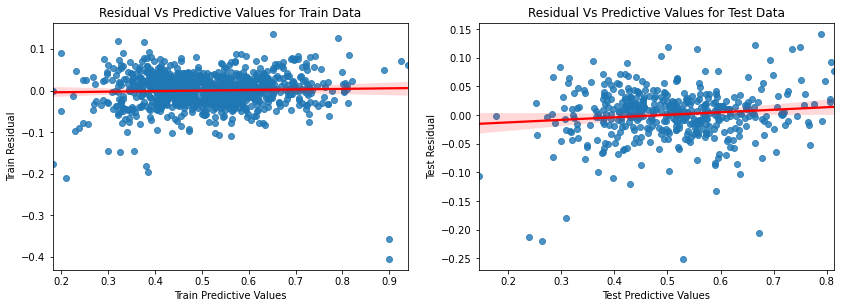

In [108]:
plt.figure(figsize=(14,10))
#Train Data
plt.subplot(2,2,1)
sns.regplot(x=y_train_pred,y=residual_train, line_kws={"color": "red"})
plt.title("Residual Vs Predictive Values for Train Data", fontdict={'fontsize':12})
plt.xlabel("Train Predictive Values")
plt.ylabel("Train Residual")

#Test Data
plt.subplot(2,2,2)
sns.regplot(x=y_test_pred,y=residual_test, line_kws={"color": "red"})
plt.title("Residual Vs Predictive Values for Test Data", fontdict={'fontsize':12})
plt.xlabel("Test Predictive Values")
plt.ylabel("Test Residual")
plt.show()

`There is no relation and specific pattern between residual and predicted values, henceforth its good model `

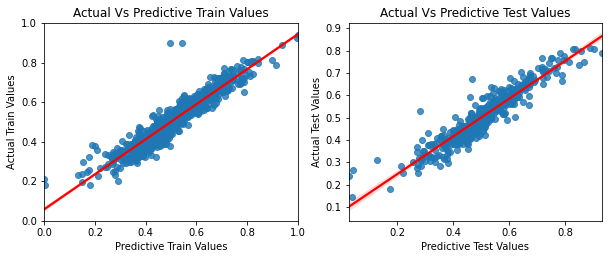

In [109]:
plt.figure(figsize=(10,8))

#Train Data
plt.subplot(2,2,1)
sns.regplot(x=y_train,y=y_train_pred, line_kws={"color": "red"})
plt.title("Actual Vs Predictive Train Values", fontdict={'fontsize':12})
plt.xlabel("Predictive Train Values")
plt.ylabel("Actual Train Values")

#Test Data
plt.subplot(2,2,2)
sns.regplot(x=y_test,y=y_test_pred, line_kws={"color": "red"})
plt.title("Actual Vs Predictive Test Values", fontdict={'fontsize':12})
plt.xlabel("Predictive Test Values")
plt.ylabel("Actual Test Values")

plt.show()

## <font color="green">Conclusion:</font>

- The residual analysis for both test and train data seem to fit the assumptions of the Linear Regression.
- Residuals have mean of zero and closely normally distributed.
- Residuals do not have any pattern hence it has homoscedasticity.


Below are the TOP 10 variables which are significant in predicting the Sale Price.
- **GrLivArea:** Above grade (ground) living area square feet.
- **OverallQual:** Rates the overall material and finish of the house.
- **MSZoning_RL:** Identifies residential with Low Density zone. 
- **MSZoning_RH:** Identifies residential with High Density zone. 
- **OverallCond:** Rates the overall condition of the house.
- **GarageCars:** Size of garage in car capacity.
- **LotArea:** Lot size in square feet
- **BedroomAbvGr:** Bedrooms above grade (does NOT include basement bedrooms)
- **MSZoning_RM:** Identifies residential with Medium Density zone.
- **MSZoning_FV:** Identifies residential with Floating Village Residential

**Ridge Regression**
   - R2 score(Train): 90.05%
   - R2 score(Test): 87.86%
        
**Lasso Regression**
   - R2 score(Train): 89.88%
   - R2 score(Test): 88.20%

Optimal value of alpha for Ridge and Lasso Regression is below:

- **Alpha value for Ridge Regression:** <font color="blue">1</font>
        
- **Alpha value for Lasso Regression:** <font color="blue">0.0001</font>

******************************************************************************************************************
 # <font color=green>End of Problem Statement - Part I of the Assignment</font>

******************************************************************************************************************

## <font color = blue>Problem Statement - Part II  <font>

**<font color=red>Question 1) What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?</font>**

**<font color=green>Answer 1:</font>** 


Optimal value of alpha for Ridge and Lasso Regression is below:

- **Alpha value for Ridge Regression:** <font color="blue">1</font>
        
- **Alpha value for Lasso Regression:** <font color="blue">0.0001</font>

In [112]:
#Fitting Ridge model for alpha = 2 and printing coefficients which have been penalised
alpha_2 = 2
ridge_2 = Ridge(alpha=alpha_2)

ridge_2.fit(X_train_new, y_train)

Ridge(alpha=2)

In [113]:
y_train_pred = ridge_2.predict(X_train_new)
y_test_pred = ridge_2.predict(X_test_new)

print("****************Data after Ridge Regression Alpha Value = 2********************")
metric2 = calculate_metric(y_train, y_train_pred, y_test, y_test_pred)
print("***************************************************************")

****************Data after Ridge Regression Alpha Value = 2********************
Train R2 score:  0.897037606776905
Test R2 score:  0.8756015874789491
Train RSS score:  1.7479548545580181
Test RSS score:  0.952363033697311
Train MSE score:  0.0017120027958452675
Test MSE score:  0.00216939187630367
Train RMSE score:  0.04137635551671108
Test RMSE score:  0.04657673106073106
***************************************************************


**<font color="black">Train R2 score reduces little bit from 90.05%  to `89.70`% and Test R2 score also reduce from 87.86% to `87.11`%.</font>**

In [115]:
#Top 10 feature of Ridge Regression

ridge_param_df_2 = pd.DataFrame({'Features':X_train_new.columns, 'Coeficient_2':ridge_2.coef_})
(ridge_param_df_2.sort_values('Coeficient_2', ascending=False)).head(10)

Features  Coeficient_2
10     GrLivArea          0.22
3    OverallQual          0.17
17    GarageCars          0.08
13  BedroomAbvGr          0.08
22   MSZoning_RL          0.08
4    OverallCond          0.07
21   MSZoning_RH          0.07
2        LotArea          0.06
20   MSZoning_FV          0.06
12      FullBath          0.06

In [116]:
####  Increasing Alpha value of Lasso Regression from 0.0001 to 0.0002 
alpha_0002 = 0.0002
lasso_0002 = Lasso(alpha=alpha_0002)

lasso_0002.fit(X_train_new, y_train)

Lasso(alpha=0.0002)

In [117]:
y_train_pred = lasso_0002.predict(X_train_new)
y_test_pred = lasso_0002.predict(X_test_new)

print("****************Data after Lasso Regression with Value = 0.0002********************")
metric5 = calculate_metric(y_train, y_train_pred, y_test, y_test_pred)
print("***************************************************************")

****************Data after Lasso Regression with Value = 0.0002********************
Train R2 score:  0.8905875740768064
Test R2 score:  0.8765717458583819
Train RSS score:  1.8574546983093807
Test RSS score:  0.9449357445649256
Train MSE score:  0.0018192504390885217
Test MSE score:  0.0021524732222435662
Train RMSE score:  0.042652672121316404
Test RMSE score:  0.04639475425350981
***************************************************************


**<font color="black">Train R2 score reduces little bit from 89.88%  to `89.05`% and Test R2 score also reduce from 88.20% to `87.65`%.</font>**

In [119]:
#Top 10 feature of Lasso Regression

lasso_param_df_0002 = pd.DataFrame({'Features':X_train_new.columns, 'Coeficient_0002':lasso_0002.coef_})
(lasso_param_df_0002.sort_values('Coeficient_0002', ascending=False)).head(10)

Features  Coeficient_0002
10             GrLivArea             0.30
3            OverallQual             0.20
17            GarageCars             0.08
4            OverallCond             0.07
11          BsmtFullBath             0.05
12              FullBath             0.04
27  Neighborhood_Crawfor             0.04
31  Neighborhood_NridgHt             0.04
13          BedroomAbvGr             0.04
5               BsmtQual             0.04

In [121]:
mt_table_2 = {'Metrics': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)', 
                          'RMSE (Train)','RMSE (Test)'], 
              'Ridge Regression_1': metric2, 
              'Lasso Regression_0.0001': metric3, 
              'Ridge Regression_2': metric2, 
              'Lasso Regression_0.0002': metric5, 
            }

final_metric_2 = pd.DataFrame(mt_table_2 ,columns = ['Metrics', 'Ridge Regression_1', 'Lasso Regression_0.0001', 'Ridge Regression_2', 'Lasso Regression_0.0002'] )

final_metric_2

Metrics  Ridge Regression_1  Lasso Regression_0.0001  \
0  R2 Score (Train)            8.97e-01                 8.99e-01   
1   R2 Score (Test)            8.76e-01                 8.82e-01   
2       RSS (Train)            1.75e+00                 1.72e+00   
3        RSS (Test)            9.52e-01                 9.03e-01   
4       MSE (Train)            1.71e-03                 1.68e-03   
5        MSE (Test)            2.17e-03                 2.06e-03   
6      RMSE (Train)            4.14e-02                 4.10e-02   
7       RMSE (Test)            4.66e-02                 4.54e-02   

   Ridge Regression_2  Lasso Regression_0.0002  
0            8.97e-01                 8.91e-01  
1            8.76e-01                 8.77e-01  
2            1.75e+00                 1.86e+00  
3            9.52e-01                 9.45e-01  
4            1.71e-03                 1.82e-03  
5            2.17e-03                 2.15e-03  
6            4.14e-02                 4.27e-02  
7            4.66e-02                 4.64e-02

`There is minor reduction in both train and test R2 when we double value of alpha`

In [122]:
#Lets observe the changes in the co-efficient after the regularization
betas_2 = pd.DataFrame(index=X_train_new.columns)

In [123]:
betas_2.rows = X_train_new.columns

In [124]:
betas_2['Ridge_2'] = ridge_2.coef_
betas_2['Lasso_0002'] = lasso_0002.coef_

In [125]:
pd.set_option('display.max_rows', None)
betas_2.head(50)

Ridge_2  Lasso_0002
MSSubClass            -3.62e-02   -3.38e-02
LotFrontage           -2.26e-02   -0.00e+00
LotArea                6.24e-02    8.68e-03
OverallQual            1.74e-01    2.03e-01
OverallCond            7.23e-02    6.93e-02
BsmtQual               5.59e-02    3.63e-02
BsmtExposure           2.92e-02    2.79e-02
BsmtFinType1           2.23e-02    2.44e-02
BsmtFinSF1             1.48e-02    0.00e+00
HeatingQC              2.14e-02    1.75e-02
GrLivArea              2.17e-01    2.97e-01
BsmtFullBath           4.42e-02    4.61e-02
FullBath               5.63e-02    4.08e-02
BedroomAbvGr           7.56e-02    3.63e-02
KitchenQual            3.06e-02    2.25e-02
FireplaceQu            3.46e-02    3.01e-02
GarageFinish           2.54e-02    2.30e-02
GarageCars             7.88e-02    7.97e-02
WoodDeckSF             2.61e-02    2.00e-02
HouseOld              -2.74e-02   -2.89e-02
MSZoning_FV            6.16e-02    1.83e-02
MSZoning_RH            6.61e-02    1.71e-02
MSZoning_RL            7.54e-02    3.56e-02
MSZoning_RM            4.80e-02    0.00e+00
LotConfig_FR2         -1.94e-02   -7.36e-03
LotConfig_FR3         -1.33e-02   -0.00e+00
Neighborhood_ClearCr   3.83e-02    3.27e-02
Neighborhood_Crawfor   5.02e-02    3.96e-02
Neighborhood_Edwards  -2.30e-02   -2.33e-02
Neighborhood_MeadowV  -2.16e-02   -0.00e+00
Neighborhood_NoRidge   4.76e-02    3.15e-02
Neighborhood_NridgHt   4.64e-02    3.76e-02
Neighborhood_Somerst   4.03e-02    3.59e-02
Neighborhood_StoneBr   4.03e-02    2.03e-02
Neighborhood_Veenker   3.55e-02    1.84e-02
BldgType_Twnhs        -1.55e-02   -9.93e-03
HouseStyle_2.5Fin     -2.28e-03   -0.00e+00
Exterior1st_BrkComm   -3.47e-02   -0.00e+00
Exterior1st_BrkFace    2.80e-02    2.65e-02
Exterior1st_CBlock    -1.04e-02   -0.00e+00
Exterior2nd_AsphShn    8.24e-03    0.00e+00
Exterior2nd_CBlock    -1.04e-02   -0.00e+00
Exterior2nd_Stucco    -2.40e-02   -2.27e-02
Exterior2nd_Wd Shng   -2.76e-02   -2.10e-02
Foundation_CBlock      1.77e-02    9.92e-03
Foundation_PConc       2.11e-02    1.53e-02
Foundation_Slab        3.45e-02    8.57e-03
Foundation_Stone       3.04e-02    0.00e+00
Foundation_Wood        2.66e-02    0.00e+00
SaleCondition_AdjLand  7.54e-03    0.00e+00

**Below are the TOP 10 variables which are significant in predicting the Sale Price after doubling ALPHA values.**

- **GrLivArea:** Above grade (ground) living area square feet.
- **OverallQual:** Rates the overall material and finish of the house.
- **GarageCars:** Size of garage in car capacity.
- **OverallCond:** Rates the overall condition of the house.
- **FullBath:** Full bathrooms above grade
- **BedroomAbvGr:** Bedrooms above grade (does NOT include basement bedrooms)
- **MSZoning_RL:** Identifies residential with Low Density zone. 
- **Neighborhood_NridgHt:** hysical locations within Ames city limits Northridge Heights
- **BsmtFullBath:** Basement full bathrooms
- **Neighborhood_Crawfor:** Physical locations within Ames city limits is Crawford.

**<font color=red>Question 2) You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?</font>**

**<font color=green>Answer 2:</font>** 

R2 Score of `Lasso is better than Ridge` for Test Data, so we will prefer to go for Lasso regression.
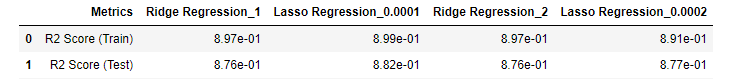

**<font color=red>Question 3) After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?</font>**


**<font color=green>Answer 3:</font>** 


Below are the TOP 5 variables which are significant in predicting the Sale Price.

- **GrLivArea:** Above grade (ground) living area square feet.
- **OverallQual:** Rates the overall material and finish of the house.
- **GarageCars:** Size of garage in car capacity.
- **OverallCond:** Rates the overall condition of the house.
- **BsmtFullBath:** Basement full bathrooms

So let's remove those and again build model using Lasso Regression.

In [127]:
#drop Top 5 column list 
drop_top5 = ['GrLivArea', 'OverallQual', 'GarageCars', 'OverallCond', 'BsmtFullBath']

In [128]:
#Display the previous list of columns
print("************Train Data Columns**************")
print(X_train_new.columns)
print("\n************Test Data Columns**************")
print(X_test_new.columns)

print("\nShape of Train Data Set: ", X_train_new.shape)
print("\nShape of Test Data Set: ", X_test_new.shape)

************Train Data Columns**************
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'HeatingQC',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenQual',
       'FireplaceQu', 'GarageFinish', 'GarageCars', 'WoodDeckSF', 'HouseOld',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'BldgType_Twnhs',
       'HouseStyle_2.5Fin', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock',
       'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_S

In [129]:
#Let's drop "drop_top5" from X_train_new.columns and X_test_new.columns
X_train_new_2 = X_train_new.drop(drop_top5, axis=1)
X_test_new_2 = X_test_new.drop(drop_top5, axis=1)

print("\nShape of Train Data Set after removing columns: ", X_train_new_2.shape)
print("\nShape of Test Data Set after removing columns: ", X_test_new_2.shape)


Shape of Train Data Set after removing columns:  (1021, 45)

Shape of Test Data Set after removing columns:  (439, 45)


## Build lasso regression after dropping top 5 vairables from previous model

In [130]:
#Fitting lasso model for alpha = 0.0001 after droping the variable and fetching coefocoent which have beeen penalised
alpha_drop = 0.0001
lasso_drop = Lasso(alpha=alpha_drop)

lasso_drop.fit(X_train_new_2, y_train)

Lasso(alpha=0.0001)

In [131]:
y_train_pred = lasso_drop.predict(X_train_new_2)
y_test_pred = lasso_drop.predict(X_test_new_2)

print("****************Data after Lasso Regression with Value = 0.0001 after removal top 5 variables********************")
metric6 = calculate_metric(y_train, y_train_pred, y_test, y_test_pred)
print("***************************************************************")

****************Data after Lasso Regression with Value = 0.0001 after removal top 5 variables********************
Train R2 score:  0.8420975808214957
Test R2 score:  0.802262126816478
Train RSS score:  2.680651561308232
Test RSS score:  1.513831543067687
Train MSE score:  0.0026255157309581115
Test MSE score:  0.0034483634238443896
Train RMSE score:  0.051239786601410736
Test RMSE score:  0.05872276750838971
***************************************************************


**<font color="black">`Train R2 score reduces` drastically bit from `89.88%`  to `84.20%` and `Test R2 score also reduces` from `88.20%` to `80.22%` after removal of Top 5 predictive variables.</font>**

In [132]:
#Top 10 feature of Lasso Regression

lasso_param_df_drop = pd.DataFrame({'Features':X_train_new_2.columns, 'Coeficient_drop':lasso_drop.coef_})
(lasso_param_df_drop.sort_values('Coeficient_drop', ascending=False)).head(10)

Features  Coeficient_drop
9           BedroomAbvGr             0.18
2                LotArea             0.14
17           MSZoning_RL             0.11
8               FullBath             0.11
6             BsmtFinSF1             0.10
3               BsmtQual             0.10
15           MSZoning_FV             0.10
16           MSZoning_RH             0.10
25  Neighborhood_NoRidge             0.09
18           MSZoning_RM             0.09

In [133]:

mt_table_3 = {'Metrics': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)', 
                          'RMSE (Train)','RMSE (Test)'], 
              'Lasso Regression_0.0001': metric3, 
              'Lasso Regression_drop_0.0001': metric6, 
             }

final_metric_3 = pd.DataFrame(mt_table_3 ,columns = ['Metrics', 'Lasso Regression_0.0001', 'Lasso Regression_drop_0.0001'] )

final_metric_3

Metrics  Lasso Regression_0.0001  Lasso Regression_drop_0.0001
0  R2 Score (Train)                 8.99e-01                      8.42e-01
1   R2 Score (Test)                 8.82e-01                      8.02e-01
2       RSS (Train)                 1.72e+00                      2.68e+00
3        RSS (Test)                 9.03e-01                      1.51e+00
4       MSE (Train)                 1.68e-03                      2.63e-03
5        MSE (Test)                 2.06e-03                      3.45e-03
6      RMSE (Train)                 4.10e-02                      5.12e-02
7       RMSE (Test)                 4.54e-02                      5.87e-02

`Both Train and Test R2 score drastically decreases in Lasso Regression, after we remove top 5 redictive variables`

**Below are the TOP 5 variables which are significant in predicting the Sale Price after removing 5 predictive variables from previous model..**

 
- **BedroomAbvGr:** Bedrooms above grade (does NOT include basement bedrooms)
- **LotArea:** Lot size in square feet
- **MSZoning_RL:** Identifies residential with Low Density zone. 
- **FullBath:** Full bathrooms above grade
- **BsmtFinSF1:** Type 1 finished square feet
 

**<font color=red>Question 4) How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?</font>**

# **<font color=green>Answer 4:</font>** 

Below are the pointers I learn from the course module lecture and note down as key point.

- Robust refers the model works for a broad range of inputs. If the model gets really good results at training time (it seems “more accurate”) but won’t generalize to out-of-sample data (i.e. it isn’t robust) then we call it overfitting. 

- The model should be generalized so that the test accuracy is not lesser than the training score.

- Here in our case, based on all data and modelling both Ridge and Lasso performed good on Train and Test Data which shows our model with Alpah value "1" for Ridge and "0.0001" for Lasso is Robust and more Generalized model.

    - Simpler models are more generic
    - Simpler model requires fewer training samples
    - Simpler model are more robust

- Too much importance should not given to the outliers so that the accuracy predicted by the model is high. But outliers analysis needs to be done and only those which are relevant to the dataset need to be retained and rest should be dropped.

**If the accuracy of the Train and Test are same then that means model is overfitted and it learnt all the Train and Test data and model is not robust and generalized. So, it will drastically be failed and will not work on broad range of unseen data.**

******************************************************************************************************************
 # <font color=green>End of Problem Statement - Part II of the Assignment</font>

******************************************************************************************************************